In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import *
from scipy.stats import entropy as en
d1 =open("accepted.txt")
d2 = open("allowed copy.txt")
accepted_words = []
accepted_words = d1.read().split(' ')
allowed_words = []
allowed_words = d2.read().split(' ')
no_of_aw = len(allowed_words)
y = np.random.rand(1)
y = np.round(y*len(accepted_words))
target= accepted_words[y[0].astype(int)]

# Pattern

In [2]:
def cpl(x,space):
    temp_i = x
    patterns = []
    for y in space:
        #print(y)
        temp = y
        l_c = 0
        t = ['0']*5 #change
        for j in x:
            if(j in temp):
                if(temp_i.index(j)==temp.index(j)):
                    #print(temp_i.index(j),temp.index(j))
                    t[temp.index(j)] = '2'
                elif(temp[l_c] == j):
                    t[l_c] = '2'
                else:
                    t[l_c] = '1'
                temp=temp.replace(j,'#',1)
                #temp_i = temp_i.replace(j,'#',1)

                #print(temp)
            l_c+=1
        q = ''
        for s in t:
            q += s
        if(q not in patterns):
            patterns.append(q)
    return patterns

In [3]:
def guess_pattern(x,y):
    temp_i = x
    patterns = []
        #print(y)
    temp = y
    l_c = 0
    t = ['0']*5 #change
    for j in x:
        if(j in temp):
            if(temp_i.index(j)==temp.index(j)):
                #print(temp_i.index(j),temp.index(j))
                t[temp.index(j)] = '2'
            elif(temp[l_c] == j):
                t[l_c] = '2'
            else:
                t[l_c] = '1'
            temp=temp.replace(j,'#',1)
        temp_i = temp_i.replace(j,'#',1)

            #print(temp)
        l_c+=1
    q = ''
    for s in t:
        q += s
    if(q not in patterns):
        patterns.append(q)
    return patterns

# Elimination

In [4]:
#original
def eliminate_1(x,y,sample):
    w = x
    not_exist = []
    exist = ['']*5 #change
    cor = ['']*5 #change
    not_elm = []
    for a in x:
        if(y[x.index(a)] == '0'):
            not_exist.append(a)
            x=x.replace(a,'#',1)
            #print(x)
        elif(y[x.index(a)] == '1'):
            exist[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
        else:
            cor[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
    #print(not_exist,exist,cor)
    
    l_ne = []
    l_e = []
    l_c = []
    for word in sample:
        #print(word, end=' ')
        c=0
        fl=[0]*5 #change
        flag = 0
        for m in cor:
            if(m != ''):
                if(m in word and word[c] == m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in cor:
            if(m != ''):
                if(fl[c] == 1):
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_c.append(word)
    if(l_c == []):
        l_c = sample
    #print(l_c)
    
    for word in l_c:
        #print(word, end=' ')
        c = 0
        fl = [0]*5
        flag = 0
        for m in exist:
            if(m !=''):
                #print(c)
                if(m in word and word[c] != m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in exist:
            if(m != ''):
                if(fl[c] == 1):
                    #print('here')
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_e.append(word)
            
    #removed y!='111111'
    if(l_e == [] and y!='11111'):
        l_e = l_c
        #l_e = []
    #print(l_e)
    temp = l_e
    #print(temp)
    for word in temp:
        #print(word)
        for m in not_exist:
            #print(m)
            count = 0
            count = exist.count(m) + cor.count(m)
            #print(count)
            if(m in word):
                if(count==0):
                    l_ne.append(word)
                    #print("removed cause no existence")
                    break
                elif(count>0):
                    if(word.count(m) > count):
                        #print("removed cause existence more than should be")
                        l_ne.append(word)
                        break
    #print(l_ne)

    return [x for x in l_e if not x in l_ne or l_ne.remove(x)]

In [4]:
def eliminate_1(x,y,sample):
    w = x
    not_exist = []
    exist = ['']*5 #
    cor = ['']*5
    not_elm = []
    for a in x:
        if(y[x.index(a)] == '0'):
            not_exist.append(a)
            x=x.replace(a,'#',1)
            #print(x)
        elif(y[x.index(a)] == '1'):
            exist[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
        else:
            cor[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
    #print(not_exist,exist,cor)
    
    l_ne = []
    l_e = []
    l_c = []
    for word in sample:
        #print(word, end=' ')
        c=0
        fl=[0]*5
        flag = 0
        for m in cor:
            if(m != ''):
                if(m in word and word[c] == m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in cor:
            if(m != ''):
                if(fl[c] == 1):
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_c.append(word)
    if(l_c == []):
        l_c = sample
    #print(l_c)
    
    for word in l_c:
        #print(word, end=' ')
        temp=word
        c = 0
        fl = [0]*5
        flag = 0
        for m in exist:
            if(m !=''):
                #print(c)
                if(m in temp and temp[c] != m):
                    fl[c] = 1
                    temp=temp.replace(m,'#',1)
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in exist:
            if(m != ''):
                if(fl[c] == 1):
                    #print('here')
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_e.append(word)
            
    #removed y!='111111'
    if(l_e == [] and y!='11111'):
        l_e = l_c
        #l_e = []
    #print(l_e)
    temp = l_e
    #print(temp)
    for word in temp:
        #print(word)
        for m in not_exist:
            #print(m)
            count = 0
            count = exist.count(m) + cor.count(m)
            #print(count)
            if(m in word):
                if(count==0):
                    l_ne.append(word)
                    #print("removed cause no existence")
                    break
                elif(count>0):
                    if(word.count(m) > count):
                        #print("removed cause existence more than should be")
                        l_ne.append(word)
                        break
    #print(l_ne)

    return [x for x in l_e if not x in l_ne or l_ne.remove(x)]

In [5]:
def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])
def eliminate_1(x,y,sample):
    w = x
    not_exist = []
    exist = ['']*5
    cor = ['']*5
    not_elm = []
    for a in x:
        if(y[x.index(a)] == '0'):
            not_exist.append(a)
            x=x.replace(a,'#',1)
            #print(x)
        elif(y[x.index(a)] == '1'):
            exist[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
        else:
            cor[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
    #print(not_exist,exist,cor)
    
    l_ne = []
    l_e = []
    l_c = []
    for word in sample:
        #print(word, end=' ')
        c=0
        fl=[0]*5
        flag = 0
        for m in cor:
            if(m != ''):
                if(m in word and word[c] == m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in cor:
            if(m != ''):
                if(fl[c] == 1):
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_c.append(word)
    if(l_c == []):
        l_c = sample
    #print(l_c)
    
    for word in l_c:
        temp = word
        c = 0
        for t in cor:
            if(t != ''):
                temp = replace_str_index(temp,c,'#')
            c+=1
        
        #print(temp, end=' ')
        c = 0
        fl = [0]*5
        flag = 0
        for m in exist:
            if(m !=''):
                
                #m in temp
                if(m in temp and temp[c] != m):
                    fl[c] = 1
                    temp = temp.replace(m,'#',1)
                    #print(temp)
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in exist:
            if(m != ''):
                if(fl[c] == 1):
                    #print('here')
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_e.append(word)
            
    #removed y!='111111'
    if(l_e == []):
        l_e = l_c
        #l_e = []
    #print(l_e)
    temp = l_e
    #print(temp)
    for word in temp:
        #print(word)
        for m in not_exist:
            #print(m)
            count = 0
            count = exist.count(m) + cor.count(m)
            #print(count)
            if(m in word):
                if(count==0):
                    l_ne.append(word)
                    #print("removed cause no existence")
                    break
                elif(count>0):
                    if(word.count(m) > count):
                        #print("removed cause existence more than should be")
                        l_ne.append(word)
                        break
    #print(l_ne)

    return [x for x in l_e if not x in l_ne or l_ne.remove(x)]

# ENTROPY

In [5]:
def entropy(sample_space):
    E = {}
    #tqdm
    for word in sample_space:
        patterns = cpl(word,sample_space)
        #print(word)
        prob = []
        for pattern in patterns:
            sample = eliminate_1(word,pattern,sample_space)
            prob.append(len(sample)/len(sample_space))


        #entropy
        freq = F[word]
        #t = np.array(prob)*freq
        #print(t," ",type(t))
        e = en(prob, base=2)
        e = e*freq
        #for i in tqdm(prob):
           # if(i != 0):
              #  e = e - i*log2(i)
            #else:
            #    e = e - i*log2(i+1)
            #print("Information bit: ",e)
        E.update({word:e})
        
        
        
        
    return E

In [6]:
def entropy2(sample_space):
    E = {}
    #tqdm
    for word in tqdm(sample_space):
        patterns = cpl(word,sample_space)
        #print(word)
        prob = []
        for pattern in patterns:
            sample = eliminate_1(word,pattern,sample_space)
            prob.append(len(sample)/len(sample_space))


        #entropy
        freq = F[word]
        #t = np.array(prob)*freq
        #print(t," ",type(t))
        #e = en(prob, base=2)
        #e = e*freq
        e = 0
        for i in prob:
            if(i != 0):
                e = e - i*freq*log2(i)
            else:
                e = e - i*freq*log2(i+1)
            #print("Information bit: ",e)
        E.update({word:e})
        
        
        
        
    return E

# Probability graphs

In [15]:
def get_graph(word,sample_space):
    patterns = cpl(word,sample_space)
    c=0
    for pattern in patterns:
        c+=1
        sample = eliminate_1(word,pattern,sample_space)
        temp = (len(sample)/len(sample_space))
        plt.bar(c,temp)
    plt.show()

In [ ]:
E = entropy(allowed_words)
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

In [10]:


# first guess
s = eliminate_1('metro','01000',allowed_words)
print(len(s))
E = entropy2(s)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

1279


100%|███████████████████████████████████████| 1279/1279 [01:04<00:00, 19.91it/s]

buffe 2.2846052257674372e-09
hygge 2.3166627885486007e-09
queyn 2.4784317332460653e-09
enfix 2.5041359735464468e-09
cubeb 2.560359575126102e-09
duded 2.606213860475149e-09
exfil 2.62997877984934e-09
exing 2.6603735720847226e-09
kvell 2.670339667630217e-09
epees 2.6841880414765653e-09
whews 2.7350063885136816e-09
skegg 2.7365983469572018e-09
equid 2.7450277289901374e-09
juvie 2.786120253780309e-09
gighe 2.7898008028461435e-09
agaze 2.7904501331845692e-09
dykey 2.809564111109951e-09
jinne 2.8148247108709324e-09
bunje 2.82727399370223e-09
quena 2.8366427394774175e-09
cleck 2.8467774050514853e-09
jivey 2.8513286880007877e-09
quean 2.854160925717363e-09
avyze 2.8634533538448942e-09
zanze 2.8786613314573603e-09
zizel 2.879757460891383e-09
sybbe 2.8861996255871056e-09
vibex 2.8873297376325606e-09
yawey 2.8922570103752983e-09
upbye 2.892594008956697e-09
queys 2.8947782280407698e-09
viewy 2.905892028550722e-09
wifie 2.912950515403032e-09
jaxie 2.9263613814059702e-09
ehing 2.9310790080714587e-09

In [ ]:
print(s)

In [11]:
# second guess
s2 = eliminate_1('based','20020',s)
print(len(s2))
E = entropy2(s2)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

3


100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 6668.21it/s]

bluey 9.784582032864416e-05
bicep 0.00021028110868426606
bleep 0.000514172802469366
Maximum value: bleep


In [22]:
# third guess
s3 = eliminate_1('thank','20220',s2)
print(s3)
E = entropy2(s3)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

['twang']


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 9341.43it/s]

twang 0.0
Maximum value: twang


In [13]:
# fourth guess
s4 = eliminate_1('jolly','02022',s3)
print(len(s4))
E = entropy2(s4)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

3


100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 8501.97it/s]

mooly 1.2920180682764544e-09
coyly 6.740975069425572e-05
cooly 7.820068560050066e-05
Maximum value: cooly


In [87]:
# fifth guess
s5 = eliminate_1('pills','11111',s4)
print(len(s5))
E = entropy2(s5)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

0


ValueError: max() arg is an empty sequence

In [ ]:
# sixth guess
s6 = eliminate_1('bills','01111',s5)
print(len(s6))
E = entropy2(s6)
E = dict(sorted(E.items(), key=lambda item: item[1]))
for i in E:
    print(i,E[i])
fin_max = max(E, key=E.get)
print("Maximum value:",fin_max)

# incorporating word frequency

In [7]:
d3 = open("count_1w.txt")
word_f = []
word_f = d3.read().split('\n')

In [8]:
F = {}
for i in tqdm(word_f):
    temp = []
    temp = i.split('\t')
    if(temp[0] in allowed_words):
        F.update({temp[0]:temp[1]})
for i in tqdm(allowed_words):
    if(i not in F):
        F.update({i:1})

100%|████████████████████████████████| 12972/12972 [00:00<00:00, 3661160.86it/s]


In [9]:

for i in F:
    F[i] = float(F[i])
#print(F)
freq_max = F[max(F, key=F.get)]
print(freq_max)
for i in F:
    F[i] = float(F[i]/freq_max)


1226734006.0


In [11]:
for i in F:
    print(type(F[i]))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

In [ ]:
print(19374934/freq_max)

In [ ]:
import requests
import urllib

def runQuery(query, start_year=2019,
            end_year=2018, corpus=26,
            smoothing=0):

    # converting a regular string to
	# the standard URL format
	# eg: "geeks for,geeks" will
	# convert to "geeks%20for%2Cgeeks"
    query = urllib.parse.quote(query)

	# creating the URL
    url = 'https://books.google.com/ngrams/json?content=' + query +'&year_start=' + str(start_year) + '&year_end=' +str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' +str(smoothing) + ''

	# requesting data from the above url
    response = requests.get(url)

	# extracting the json data from the response we got
    output = response.json()

	# creating a list to store the ngram data
    return_data = []

    if len(output) == 0:
		# if no data returned from site,
		# print the following statement
        return "No data available for this Ngram."
    else:
		# if data returned from site,
		# store the data in return_data list
        for num in range(len(output)):
			
			# getting the name
            return_data.append((output[num]['ngram'],
								
								# getting ngram data
                                output[num]['timeseries']))

    return return_data



In [ ]:
from time import sleep
w_freq={}
for i in tqdm(allowed_words):
    #sleep(1)
    temp = runQuery(i)[0][1][0]
    temp *=100
    w_freq.update({i:temp})


In [ ]:
print(guess_pattern("train", "crane"))

# Automate games

In [100]:
results={}
win_p = {}
for f_g in ['trace']:
    word_count = 0
    chances = []
    fails = []
    for target in tqdm(accepted_words):
        c = 0
        #first guess is same always
        pattern = ['00000']
        #while(pattern[0] != '22222'):
        pattern = guess_pattern(f_g,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 1")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s = eliminate_1(f_g,pattern[0],allowed_words)
        E1 = entropy2(s)
        fin_max = max(E1, key=E1.get)
        print("Suggested guess 2: ", fin_max)

            #second guess
        pattern = guess_pattern(fin_max,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 2")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s2 = eliminate_1(fin_max,pattern[0],s)
        E2 = entropy2(s2)
        fin_max2 = max(E2, key=E2.get)
        print("Suggested guess 3: ", fin_max2)

            #third guess
        pattern = guess_pattern(fin_max2,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 3")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s3 = eliminate_1(fin_max2,pattern[0],s2)
        E3 = entropy2(s3)
        fin_max3 = max(E3, key=E3.get) 
        print("Suggested guess 4: ", fin_max3)

            #fourth guess
        pattern = guess_pattern(fin_max3,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 4")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s4 = eliminate_1(fin_max3,pattern[0],s3)
        E4 = entropy2(s4)
        fin_max4 = max(E4, key=E4.get)
        print("Suggested guess 5: ", fin_max4)

            #fifth guess
        pattern = guess_pattern(fin_max4,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 5")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s5 = eliminate_1(fin_max4,pattern[0],s4)
        E5 = entropy2(s5)
        fin_max5 = max(E5, key=E5.get)
        print("Suggested guess 6: ", fin_max5)


            #sixth guess
        pattern = guess_pattern(fin_max5,target)
        c+=1
        if(pattern[0] == '22222'):
            print("Guesses taken = 6")
            print("word was ",target,"\n")
            word_count +=1
            chances.append(c)
            fails.append(1)
            continue
        s6 = eliminate_1(fin_max5,pattern[0],s5)
        E6 = entropy2(s6)
        fin_max6 = max(E6, key=E6.get)
        print(c)

        if(pattern[0] != '22222'):
            fails.append(0)
            print("failed \n")


    avg_score = sum(chances)/len(chances)
    win_p.update({f_g: sum(fails)/len(fails)})
    #print(avg_score, " steps taken to solve wordle using word = ",f_q)
    results.update({f_g:avg_score})
print(results)



  0%|                                          | 2/2309 [00:00<03:58,  9.66it/s]

Suggested guess 2:  cards
Suggested guess 3:  cigar
Guesses taken = 3
word was  cigar 

Suggested guess 2:  other
Suggested guess 3:  entry
Suggested guess 4:  merit
Suggested guess 5:  rebut
Guesses taken = 5
word was  rebut 

Suggested guess 2:  would


  0%|                                       | 3/2309 [02:06<33:49:43, 52.81s/it]

Suggested guess 3:  ships
Suggested guess 4:  sissy
Guesses taken = 4
word was  sissy 

Suggested guess 2:  would


  0%|                                       | 5/2309 [04:10<33:08:09, 51.77s/it]

Suggested guess 3:  using
Suggested guess 4:  puppy
Suggested guess 5:  humph
Guesses taken = 5
word was  humph 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Suggested guess 5:  quake
Suggested guess 6:  awake
Guesses taken = 6
word was  awake 



  0%|                                       | 6/2309 [06:14<48:17:52, 75.50s/it]

Suggested guess 2:  would
Suggested guess 3:  plugs
Suggested guess 4:  flush
Suggested guess 5:  blush
Guesses taken = 5
word was  blush 



  0%|▏                                      | 8/2309 [06:15<22:34:33, 35.32s/it]

Suggested guess 2:  local
Suggested guess 3:  vocal
Suggested guess 4:  focal
Guesses taken = 4
word was  focal 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  evade
Guesses taken = 4
word was  evade 



  0%|▏                                      | 9/2309 [07:17<27:56:24, 43.73s/it]

Suggested guess 2:  human
Suggested guess 3:  final
Suggested guess 4:  naval
Guesses taken = 4
word was  naval 



  0%|▏                                     | 10/2309 [07:17<19:26:20, 30.44s/it]

Suggested guess 2:  where
Suggested guess 3:  serve
Guesses taken = 3
word was  serve 

Suggested guess 2:  least
Suggested guess 3:  death
Suggested guess 4:  heath
Guesses taken = 4
word was  heath 



  1%|▏                                     | 12/2309 [07:17<10:21:40, 16.24s/it]

Suggested guess 2:  board
Suggested guess 3:  diary
Suggested guess 4:  dwarf
Guesses taken = 4
word was  dwarf 



  1%|▏                                     | 13/2309 [08:25<18:28:09, 28.96s/it]

Suggested guess 2:  video
Suggested guess 3:  model
Guesses taken = 3
word was  model 



  1%|▏                                     | 14/2309 [08:31<14:39:03, 22.98s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  karma
Guesses taken = 4
word was  karma 



  1%|▏                                     | 15/2309 [08:39<11:59:10, 18.81s/it]

Suggested guess 2:  south
Suggested guess 3:  still
Suggested guess 4:  sting
Suggested guess 5:  stink
Guesses taken = 5
word was  stink 

Suggested guess 2:  grade
Guesses taken = 2
word was  grade 



  1%|▎                                      | 17/2309 [08:41<7:06:54, 11.18s/it]

Suggested guess 2:  items
Suggested guess 3:  eight
Suggested guess 4:  quiet
Guesses taken = 4
word was  quiet 

Suggested guess 2:  check
Suggested guess 3:  bench
Guesses taken = 3
word was  bench 

Suggested guess 2:  state
Suggested guess 3:  plate
Suggested guess 4:  agate
Suggested guess 5:  abate
Guesses taken = 5
word was  abate 



  1%|▎                                     | 20/2309 [09:47<10:25:01, 16.38s/it]

Suggested guess 2:  video
Suggested guess 3:  being
Suggested guess 4:  neigh
Suggested guess 5:  feign
Guesses taken = 5
word was  feign 



  1%|▍                                      | 23/2309 [09:53<5:59:46,  9.44s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Guesses taken = 3
word was  major 

Suggested guess 2:  least
Suggested guess 3:  death
Guesses taken = 3
word was  death 

Suggested guess 2:  order
Suggested guess 3:  press
Suggested guess 4:  fresh
Guesses taken = 4
word was  fresh 

Suggested guess 2:  crust
Guesses taken = 2
word was  crust 



  1%|▍                                      | 25/2309 [10:01<4:49:29,  7.60s/it]

Suggested guess 2:  south
Suggested guess 3:  stood
Suggested guess 4:  stool
Guesses taken = 4
word was  stool 



  1%|▍                                      | 27/2309 [10:04<3:20:32,  5.27s/it]

Suggested guess 2:  music
Suggested guess 3:  congo
Suggested guess 4:  colon
Guesses taken = 4
word was  colon 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Suggested guess 5:  abase
Guesses taken = 5
word was  abase 



  1%|▍                                      | 28/2309 [10:10<3:29:24,  5.51s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  harry
Suggested guess 5:  barry
Suggested guess 6:  marry
Guesses taken = 6
word was  marry 

Suggested guess 2: 

  1%|▌                                      | 30/2309 [10:13<2:21:18,  3.72s/it]

 react
Guesses taken = 2
word was  react 

Suggested guess 2:  about
Suggested guess 3:  baths
Suggested guess 4:  batty
Guesses taken = 4
word was  batty 

Suggested guess 2:  drive
Suggested guess 3:  pride
Guesses taken = 3
word was  pride 



  1%|▌                                     | 32/2309 [12:20<16:09:42, 25.55s/it]

Suggested guess 2:  would
Suggested guess 3:  blogs
Suggested guess 4:  floss
Guesses taken = 4
word was  floss 



  1%|▌                                     | 33/2309 [13:26<21:31:25, 34.04s/it]

Suggested guess 2:  video
Suggested guess 3:  being
Suggested guess 4:  lewis
Suggested guess 5:  helix
Guesses taken = 5
word was  helix 

Suggested guess 2:  orcas
Suggested guess 3:  croak
Guesses taken = 3
word was  croak 



  2%|▌                                     | 35/2309 [13:26<13:32:12, 21.43s/it]

Suggested guess 2:  staff
Guesses taken = 2
word was  staff 



  2%|▌                                     | 36/2309 [13:27<10:49:40, 17.15s/it]

Suggested guess 2:  paper
Guesses taken = 2
word was  paper 



  2%|▌                                     | 37/2309 [14:34<17:59:12, 28.50s/it]

Suggested guess 2:  video
Suggested guess 3:  speed
Suggested guess 4:  glued
Suggested guess 5:  nuked
Suggested guess 6:  unwed
6
failed 

Suggested guess 2:  video


  2%|▋                                     | 38/2309 [15:41<24:02:13, 38.10s/it]

Suggested guess 3:  weeks
Suggested guess 4:  whelp
Guesses taken = 4
word was  whelp 

Suggested guess 2:  train
Suggested guess 3:  trash
Suggested guess 4:  tramp
Suggested guess 5:  trawl
Guesses taken = 5
word was  trawl 



  2%|▋                                     | 40/2309 [15:49<15:04:19, 23.91s/it]

Suggested guess 2:  south
Suggested guess 3:  futon
Suggested guess 4:  outdo
Guesses taken = 4
word was  outdo 



  2%|▋                                     | 41/2309 [15:49<11:41:29, 18.56s/it]

Suggested guess 2:  value
Suggested guess 3:  anime
Suggested guess 4:  adobe
Guesses taken = 4
word was  adobe 

Suggested guess 2:  crazy
Guesses taken = 2
word was  crazy 

Suggested guess 2:  under


  2%|▋                                      | 43/2309 [16:00<8:24:03, 13.35s/it]

Suggested guess 3:  power
Suggested guess 4:  lower
Suggested guess 5:  mower
Suggested guess 6:  bower
6
failed 



  2%|▋                                      | 44/2309 [16:01<6:41:30, 10.64s/it]

Suggested guess 2:  paper
Suggested guess 3:  opera
Suggested guess 4:  repay
Guesses taken = 4
word was  repay 



  2%|▊                                      | 47/2309 [16:09<3:43:57,  5.94s/it]

Suggested guess 2:  south
Suggested guess 3:  limit
Suggested guess 4:  digit
Guesses taken = 4
word was  digit 

Suggested guess 2:  crate
Guesses taken = 2
word was  crate 

Suggested guess 2:  which
Suggested guess 3:  block
Suggested guess 4:  pluck
Suggested guess 5:  cluck
Guesses taken = 5
word was  cluck 



  2%|▊                                      | 48/2309 [16:14<3:34:47,  5.70s/it]

Suggested guess 2:  phone
Suggested guess 3:  spike
Guesses taken = 3
word was  spike 



  2%|▊                                      | 49/2309 [16:17<3:08:35,  5.01s/it]

Suggested guess 2:  music
Suggested guess 3:  mimic
Guesses taken = 3
word was  mimic 



  2%|▊                                     | 50/2309 [18:21<22:29:05, 35.83s/it]

Suggested guess 2:  would
Suggested guess 3:  found
Suggested guess 4:  sound
Suggested guess 5:  bound
Suggested guess 6:  pound
Guesses taken = 6
word was  pound 



  2%|▊                                     | 51/2309 [19:23<26:49:31, 42.77s/it]

Suggested guess 2:  human
Suggested guess 3:  sigma
Suggested guess 4:  maxim
Guesses taken = 4
word was  maxim 



  2%|▊                                     | 52/2309 [20:29<30:53:43, 49.28s/it]

Suggested guess 2:  video
Suggested guess 3:  files
Suggested guess 4:  pixel
Suggested guess 5:  linen
Guesses taken = 5
word was  linen 



  2%|▊                                     | 53/2309 [20:32<22:36:36, 36.08s/it]

Suggested guess 2:  items
Suggested guess 3:  empty
Suggested guess 4:  motel
Suggested guess 5:  unmet
Guesses taken = 5
word was  unmet 

Suggested guess 2:  video


  2%|▉                                     | 54/2309 [21:41<28:29:15, 45.48s/it]

Suggested guess 3:  weeks
Suggested guess 4:  shell
Suggested guess 5:  flesh
Guesses taken = 5
word was  flesh 

Suggested guess 2:  would


  2%|▉                                     | 55/2309 [23:46<43:00:56, 68.70s/it]

Suggested guess 3:  books
Suggested guess 4:  booby
Guesses taken = 4
word was  booby 



  2%|▉                                     | 56/2309 [23:46<30:23:40, 48.57s/it]

Suggested guess 2:  first
Suggested guess 3:  forth
Guesses taken = 3
word was  forth 



  3%|▉                                     | 58/2309 [23:46<15:05:12, 24.13s/it]

Suggested guess 2:  first
Guesses taken = 2
word was  first 

Suggested guess 2:  staff
Suggested guess 3:  stand
Guesses taken = 3
word was  stand 

Suggested guess 2:  video


  3%|▉                                     | 59/2309 [24:54<23:06:13, 36.97s/it]

Suggested guess 3:  weeks
Suggested guess 4:  begun
Suggested guess 5:  belly
Guesses taken = 5
word was  belly 



  3%|▉                                     | 60/2309 [25:00<17:19:47, 27.74s/it]

Suggested guess 2:  world
Suggested guess 3:  minor
Suggested guess 4:  ivory
Guesses taken = 4
word was  ivory 



  3%|█                                     | 61/2309 [26:06<24:28:16, 39.19s/it]

Suggested guess 2:  video
Suggested guess 3:  needs
Suggested guess 4:  seedy
Guesses taken = 4
word was  seedy 

Suggested guess 2:  print
Guesses taken = 2
word was  print 

Suggested guess 2:  years
Suggested guess 3:  yearn
Guesses taken = 3
word was  yearn 



  3%|█                                     | 64/2309 [26:06<10:43:48, 17.21s/it]

Suggested guess 2:  brand
Suggested guess 3:  drawn
Suggested guess 4:  drain
Guesses taken = 4
word was  drain 

Suggested guess 2:  drive
Suggested guess 3:  prime
Suggested guess 4:  urine
Suggested guess 5:  bribe
Guesses taken = 5
word was  bribe 



  3%|█                                      | 66/2309 [26:14<7:49:27, 12.56s/it]

Suggested guess 2:  south
Suggested guess 3:  stout
Guesses taken = 3
word was  stout 



  3%|█▏                                     | 67/2309 [26:19<6:56:18, 11.14s/it]

Suggested guess 2:  games
Suggested guess 3:  panel
Guesses taken = 3
word was  panel 

Suggested guess 2:  crazy
Suggested guess 3:  crash
Suggested guess 4:  crass
Guesses taken = 4
word was  crass 

Suggested guess 2:  phone


  3%|█▏                                     | 69/2309 [26:24<5:01:52,  8.09s/it]

Suggested guess 3:  guide
Suggested guess 4:  emule
Suggested guess 5:  blume
Suggested guess 6:  flume
Guesses taken = 6
word was  flume 

Suggested guess 2:  human


  3%|█▏                                    | 70/2309 [27:26<11:53:06, 19.11s/it]

Suggested guess 3:  salad
Suggested guess 4:  loyal
Suggested guess 5:  offal
Guesses taken = 5
word was  offal 

Suggested guess 2:  large
Suggested guess 3:  agree
Guesses taken = 3
word was  agree 



  3%|█▏                                     | 72/2309 [27:26<7:30:12, 12.08s/it]

Suggested guess 2:  order
Suggested guess 3:  error
Guesses taken = 3
word was  error 



  3%|█▏                                     | 73/2309 [27:32<6:42:07, 10.79s/it]

Suggested guess 2:  world
Suggested guess 3:  swirl
Guesses taken = 3
word was  swirl 

Suggested guess 2:  argue
Guesses taken = 2
word was  argue 



  3%|█▏                                    | 75/2309 [28:39<11:55:50, 19.23s/it]

Suggested guess 2:  video
Suggested guess 3:  speed
Suggested guess 4:  bleed
Guesses taken = 4
word was  bleed 



  3%|█▎                                     | 77/2309 [28:39<7:15:59, 11.72s/it]

Suggested guess 2:  metal
Suggested guess 3:  delta
Guesses taken = 3
word was  delta 

Suggested guess 2:  which
Suggested guess 3:  click
Suggested guess 4:  slick
Suggested guess 5:  flick
Guesses taken = 5
word was  flick 



  3%|█▎                                     | 78/2309 [28:39<5:29:25,  8.86s/it]

Suggested guess 2:  times
Suggested guess 3:  totem
Guesses taken = 3
word was  totem 

Suggested guess 2:  under


  3%|█▎                                     | 79/2309 [28:50<5:49:00,  9.39s/it]

Suggested guess 3:  power
Suggested guess 4:  woker
Suggested guess 5:  wooer
Guesses taken = 5
word was  wooer 

Suggested guess 2:  print
Suggested guess 3:  front
Guesses taken = 3
word was  front 



  4%|█▎                                     | 81/2309 [28:56<4:07:27,  6.66s/it]

Suggested guess 2:  world
Suggested guess 3:  virus
Suggested guess 4:  syrup
Suggested guess 5:  shrub
Guesses taken = 5
word was  shrub 



  4%|█▍                                     | 82/2309 [29:03<4:04:01,  6.57s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  parry
Guesses taken = 4
word was  parry 



  4%|█▍                                     | 83/2309 [29:08<3:48:49,  6.17s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  diode
Suggested guess 5:  biome
Guesses taken = 5
word was  biome 



  4%|█▍                                     | 84/2309 [29:13<3:40:35,  5.95s/it]

Suggested guess 2:  games
Suggested guess 3:  panel
Suggested guess 4:  lapel
Guesses taken = 4
word was  lapel 

Suggested guess 2:  start
Guesses taken = 2
word was  start 

Suggested guess 2:  brent
Suggested guess 3:  greet
Guesses taken = 3
word was  greet 



  4%|█▍                                     | 87/2309 [29:23<2:51:42,  4.64s/it]

Suggested guess 2:  under
Suggested guess 3:  never
Suggested guess 4:  owner
Suggested guess 5:  boner
Suggested guess 6:  loner
6
failed 

Suggested guess 2:  video


  4%|█▍                                    | 88/2309 [30:29<10:30:12, 17.02s/it]

Suggested guess 3:  women
Suggested guess 4:  moses
Suggested guess 5:  golem
Guesses taken = 5
word was  golem 



  4%|█▌                                     | 89/2309 [30:37<9:13:26, 14.96s/it]

Suggested guess 2:  south
Suggested guess 3:  units
Suggested guess 4:  busty
Suggested guess 5:  dusty
Suggested guess 6:  lusty
Guesses taken = 6
word was  lusty 



  4%|█▍                                    | 90/2309 [32:41<25:30:00, 41.37s/it]

Suggested guess 2:  would
Suggested guess 3:  login
Suggested guess 4:  looks
Suggested guess 5:  loopy
Guesses taken = 5
word was  loopy 



  4%|█▍                                    | 91/2309 [32:47<19:52:18, 32.25s/it]

Suggested guess 2:  world
Suggested guess 3:  round
Guesses taken = 3
word was  round 



  4%|█▌                                    | 92/2309 [32:49<14:52:52, 24.16s/it]

Suggested guess 2:  about
Suggested guess 3:  adult
Suggested guess 4:  audit
Guesses taken = 4
word was  audit 



  4%|█▌                                    | 93/2309 [34:53<31:54:47, 51.84s/it]

Suggested guess 2:  would
Suggested guess 3:  links
Suggested guess 4:  lying
Guesses taken = 4
word was  lying 



  4%|█▌                                    | 94/2309 [35:56<33:48:25, 54.95s/it]

Suggested guess 2:  human
Suggested guess 3:  gamma
Guesses taken = 3
word was  gamma 



  4%|█▌                                    | 95/2309 [36:02<25:07:37, 40.86s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Suggested guess 4:  labor
Guesses taken = 4
word was  labor 



  4%|█▌                                    | 96/2309 [36:05<18:17:18, 29.75s/it]

Suggested guess 2:  items
Suggested guess 3:  inset
Suggested guess 4:  islet
Guesses taken = 4
word was  islet 



  4%|█▌                                    | 97/2309 [36:08<13:25:26, 21.85s/it]

Suggested guess 2:  music
Suggested guess 3:  logic
Suggested guess 4:  civic
Guesses taken = 4
word was  civic 



  4%|█▋                                     | 99/2309 [36:08<6:42:35, 10.93s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  forge
Guesses taken = 4
word was  forge 

Suggested guess 2:  color
Suggested guess 3:  corps
Suggested guess 4:  corgi
Suggested guess 5:  corby
Suggested guess 6:  corny
Guesses taken = 6
word was  corny 



  4%|█▋                                    | 100/2309 [36:16<6:06:55,  9.97s/it]

Suggested guess 2:  south
Suggested guess 3:  mount
Suggested guess 4:  moult
Guesses taken = 4
word was  moult 



  4%|█▋                                    | 101/2309 [36:17<4:27:27,  7.27s/it]

Suggested guess 2:  local
Suggested guess 3:  china
Suggested guess 4:  basic
Guesses taken = 4
word was  basic 

Suggested guess 2:  human


  5%|█▋                                    | 104/2309 [37:19<7:47:08, 12.71s/it]

Suggested guess 3:  salad
Guesses taken = 3
word was  salad 

Suggested guess 2:  state
Suggested guess 3:  plate
Suggested guess 4:  agate
Guesses taken = 4
word was  agate 

Suggested guess 2:  which
Suggested guess 3:  click
Suggested guess 4:  juicy
Suggested guess 5:  spicy
Guesses taken = 5
word was  spicy 



  5%|█▋                                    | 105/2309 [37:25<6:48:24, 11.12s/it]

Suggested guess 2:  radio
Suggested guess 3:  sugar
Suggested guess 4:  spray
Guesses taken = 4
word was  spray 



  5%|█▋                                    | 106/2309 [37:30<5:52:06,  9.59s/it]

Suggested guess 2:  games
Suggested guess 3:  speak
Suggested guess 4:  essay
Guesses taken = 4
word was  essay 



  5%|█▊                                    | 107/2309 [37:36<5:16:36,  8.63s/it]

Suggested guess 2:  world
Suggested guess 3:  fjord
Guesses taken = 3
word was  fjord 



  5%|█▋                                   | 108/2309 [38:42<15:03:53, 24.64s/it]

Suggested guess 2:  video
Suggested guess 3:  needs
Suggested guess 4:  spend
Guesses taken = 4
word was  spend 



  5%|█▋                                   | 109/2309 [38:47<11:41:03, 19.12s/it]

Suggested guess 2:  games
Suggested guess 3:  equal
Suggested guess 4:  ahead
Suggested guess 5:  kebab
Guesses taken = 5
word was  kebab 



  5%|█▊                                   | 110/2309 [40:51<30:07:51, 49.33s/it]

Suggested guess 2:  would
Suggested guess 3:  build
Suggested guess 4:  guild
Guesses taken = 4
word was  guild 

Suggested guess 2:  black
Suggested guess 3:  aback
Guesses taken = 3
word was  aback 



  5%|█▊                                   | 112/2309 [40:51<16:30:42, 27.06s/it]

Suggested guess 2:  first
Suggested guess 3:  motor
Guesses taken = 3
word was  motor 



  5%|█▊                                   | 113/2309 [40:52<12:32:11, 20.55s/it]

Suggested guess 2:  value
Suggested guess 3:  alone
Guesses taken = 3
word was  alone 

Suggested guess 2:  watch
Suggested guess 3:  match
Suggested guess 4:  patch
Suggested guess 5:  catch
Suggested guess 6:  batch
6
failed 

Suggested guess 2:  under


  5%|█▉                                    | 115/2309 [41:02<8:42:24, 14.29s/it]

Suggested guess 3:  power
Suggested guess 4:  hyper
Guesses taken = 4
word was  hyper 



  5%|█▉                                    | 116/2309 [41:03<6:46:54, 11.13s/it]

Suggested guess 2:  think
Suggested guess 3:  thumb
Guesses taken = 3
word was  thumb 



  5%|█▉                                    | 117/2309 [41:08<5:59:44,  9.85s/it]

Suggested guess 2:  world
Suggested guess 3:  rowdy
Suggested guess 4:  dowry
Guesses taken = 4
word was  dowry 



  5%|█▉                                    | 118/2309 [41:16<5:38:57,  9.28s/it]

Suggested guess 2:  south
Suggested guess 3:  ought
Guesses taken = 3
word was  ought 

Suggested guess 2:  check
Suggested guess 3:  bench
Suggested guess 4:  belch
Guesses taken = 4
word was  belch 

Suggested guess 2:  stock
Suggested guess 3:  dutch
Guesses taken = 3
word was  dutch 



  5%|█▉                                    | 121/2309 [41:24<3:29:33,  5.75s/it]

Suggested guess 2:  south
Suggested guess 3:  pilot
Guesses taken = 3
word was  pilot 



  5%|██                                    | 122/2309 [41:24<2:49:07,  4.64s/it]

Suggested guess 2:  times
Suggested guess 3:  token
Suggested guess 4:  typed
Suggested guess 5:  tweed
Guesses taken = 5
word was  tweed 

Suggested guess 2:  chest
Suggested guess 3:  comet
Guesses taken = 3
word was  comet 



  5%|██                                    | 124/2309 [41:26<2:01:44,  3.34s/it]

Suggested guess 2:  about
Suggested guess 3:  fault
Suggested guess 4:  haunt
Suggested guess 5:  gaunt
Suggested guess 6:  jaunt
Guesses taken = 6
word was  jaunt 



  5%|██                                    | 125/2309 [41:31<2:15:59,  3.74s/it]

Suggested guess 2:  games
Suggested guess 3:  media
Suggested guess 4:  enema
Guesses taken = 4
word was  enema 



  5%|██                                    | 126/2309 [41:34<2:08:32,  3.53s/it]

Suggested guess 2:  items
Suggested guess 3:  steel
Suggested guess 4:  steep
Suggested guess 5:  steed
Guesses taken = 5
word was  steed 

Suggested guess 2:  human


  6%|██                                   | 127/2309 [42:38<11:09:04, 18.40s/it]

Suggested guess 3:  daily
Suggested guess 4:  abyss
Guesses taken = 4
word was  abyss 



  6%|██                                    | 128/2309 [42:39<8:20:33, 13.77s/it]

Suggested guess 2:  group
Suggested guess 3:  gross
Suggested guess 4:  grown
Suggested guess 5:  growl
Guesses taken = 5
word was  growl 



  6%|██                                   | 129/2309 [44:42<26:18:00, 43.43s/it]

Suggested guess 2:  would
Suggested guess 3:  links
Suggested guess 4:  bling
Suggested guess 5:  fling
Guesses taken = 5
word was  fling 



  6%|██                                   | 130/2309 [45:50<30:18:15, 50.07s/it]

Suggested guess 2:  video
Suggested guess 3:  owned
Suggested guess 4:  dozen
Guesses taken = 4
word was  dozen 

Suggested guess 2:  would


  6%|██                                   | 131/2309 [47:54<43:03:00, 71.16s/it]

Suggested guess 3:  books
Suggested guess 4:  booby
Suggested guess 5:  boozy
Guesses taken = 5
word was  boozy 

Suggested guess 2:  drive
Suggested guess 3:  erode
Guesses taken = 3
word was  erode 



  6%|██▏                                  | 133/2309 [48:00<24:31:10, 40.57s/it]

Suggested guess 2:  world
Guesses taken = 2
word was  world 



  6%|██▏                                  | 134/2309 [48:05<19:17:22, 31.93s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  lodge
Suggested guess 5:  gouge
Guesses taken = 5
word was  gouge 



  6%|██▎                                   | 138/2309 [48:05<6:49:36, 11.32s/it]

Suggested guess 2:  which
Suggested guess 3:  click
Guesses taken = 3
word was  click 

Suggested guess 2:  urban
Suggested guess 3:  broad
Suggested guess 4:  briar
Guesses taken = 4
word was  briar 

Suggested guess 2:  great
Guesses taken = 2
word was  great 

Suggested guess 2:  party
Suggested guess 3:  ultra
Suggested guess 4:  altar
Guesses taken = 4
word was  altar 



  6%|██▏                                  | 139/2309 [50:08<20:18:25, 33.69s/it]

Suggested guess 2:  would
Suggested guess 3:  linux
Suggested guess 4:  bulbs
Suggested guess 5:  pulpy
Guesses taken = 5
word was  pulpy 



  6%|██▏                                  | 140/2309 [50:09<15:49:39, 26.27s/it]

Suggested guess 2:  first
Suggested guess 3:  robot
Suggested guess 4:  blurt
Guesses taken = 4
word was  blurt 

Suggested guess 2:  coast
Guesses taken = 2
word was  coast 



  6%|██▎                                  | 142/2309 [50:11<10:00:12, 16.62s/it]

Suggested guess 2:  music
Suggested guess 3:  lucky
Suggested guess 4:  duchy
Guesses taken = 4
word was  duchy 



  6%|██▎                                   | 143/2309 [50:12<7:54:06, 13.13s/it]

Suggested guess 2:  group
Suggested guess 3:  gross
Suggested guess 4:  grown
Suggested guess 5:  groin
Guesses taken = 5
word was  groin 

Suggested guess 2:  under


  6%|██▎                                   | 144/2309 [50:23<7:33:01, 12.55s/it]

Suggested guess 3:  power
Suggested guess 4:  river
Suggested guess 5:  fiber
Suggested guess 6:  filer
6
failed 



  6%|██▍                                   | 145/2309 [50:23<5:43:29,  9.52s/it]

Suggested guess 2:  group
Guesses taken = 2
word was  group 



  6%|██▍                                   | 146/2309 [50:23<4:15:42,  7.09s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  rouge
Suggested guess 5:  rogue
Guesses taken = 5
word was  rogue 

Suggested guess 2:  human


  6%|██▎                                  | 147/2309 [51:28<13:40:44, 22.78s/it]

Suggested guess 3:  daily
Suggested guess 4:  badly
Guesses taken = 4
word was  badly 

Suggested guess 2:  start
Suggested guess 3:  smart
Guesses taken = 3
word was  smart 



  6%|██▍                                   | 149/2309 [51:36<8:41:23, 14.48s/it]

Suggested guess 2:  south
Suggested guess 3:  night
Suggested guess 4:  pithy
Guesses taken = 4
word was  pithy 



  6%|██▍                                  | 150/2309 [52:37<15:22:38, 25.64s/it]

Suggested guess 2:  human
Suggested guess 3:  awful
Suggested guess 4:  bayou
Suggested guess 5:  gaudy
Guesses taken = 5
word was  gaudy 



  7%|██▍                                  | 151/2309 [52:40<11:53:48, 19.85s/it]

Suggested guess 2:  music
Suggested guess 3:  child
Suggested guess 4:  chili
Suggested guess 5:  chill
Guesses taken = 5
word was  chill 



  7%|██▍                                  | 152/2309 [52:50<10:22:48, 17.32s/it]

Suggested guess 2:  under
Suggested guess 3:  henry
Suggested guess 4:  heron
Guesses taken = 4
word was  heron 

Suggested guess 2:  human


  7%|██▍                                  | 153/2309 [53:55<18:20:14, 30.62s/it]

Suggested guess 3:  daily
Suggested guess 4:  vodka
Guesses taken = 4
word was  vodka 



  7%|██▍                                  | 154/2309 [54:06<14:54:14, 24.90s/it]

Suggested guess 2:  under
Suggested guess 3:  never
Suggested guess 4:  owner
Suggested guess 5:  liner
Suggested guess 6:  miner
6
failed 



  7%|██▍                                  | 155/2309 [54:16<12:26:23, 20.79s/it]

Suggested guess 2:  under
Suggested guess 3:  super
Suggested guess 4:  suber
Suggested guess 5:  surer
Guesses taken = 5
word was  surer 



  7%|██▌                                   | 156/2309 [54:23<9:52:11, 16.50s/it]

Suggested guess 2:  radio
Guesses taken = 2
word was  radio 



  7%|██▌                                   | 157/2309 [54:23<7:01:47, 11.76s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  rouge
Guesses taken = 4
word was  rouge 

Suggested guess 2:  mercy
Suggested guess 3:  perch
Guesses taken = 3
word was  perch 

Suggested guess 2:  retch
Guesses taken = 2
word was  retch 

Suggested guess 2:  write
Suggested guess 3:  wrote
Guesses taken = 3
word was  wrote 



  7%|██▋                                   | 161/2309 [54:23<2:38:09,  4.42s/it]

Suggested guess 2:  which
Suggested guess 3:  block
Suggested guess 4:  clock
Guesses taken = 4
word was  clock 

Suggested guess 2:  these
Suggested guess 3:  title
Suggested guess 4:  tilde
Guesses taken = 4
word was  tilde 

Suggested guess 2:  store
Guesses taken = 2
word was  store 

Suggested guess 2:  drive
Suggested guess 3:  prove
Guesses taken = 3
word was  prove 



  7%|██▋                                   | 165/2309 [54:24<1:26:05,  2.41s/it]

Suggested guess 2:  group
Suggested guess 3:  bring
Guesses taken = 3
word was  bring 



  7%|██▋                                   | 166/2309 [54:29<1:38:59,  2.77s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  solve
Guesses taken = 4
word was  solve 

Suggested guess 2:  cheat
Guesses taken = 2
word was  cheat 

Suggested guess 2:  drive
Suggested guess 3:  prime
Suggested guess 4:  grime
Guesses taken = 4
word was  grime 



  7%|██▊                                   | 169/2309 [54:32<1:14:28,  2.09s/it]

Suggested guess 2:  items
Suggested guess 3:  hotel
Suggested guess 4:  lefty
Suggested guess 5:  exult
Guesses taken = 5
word was  exult 



  7%|██▊                                   | 170/2309 [54:42<1:59:54,  3.36s/it]

Suggested guess 2:  under
Suggested guess 3:  upper
Suggested guess 4:  usher
Guesses taken = 4
word was  usher 

Suggested guess 2:  check
Suggested guess 3:  bench
Suggested guess 4:  epoch
Guesses taken = 4
word was  epoch 

Suggested guess 2:  trial
Suggested guess 3:  triad
Guesses taken = 3
word was  triad 

Suggested guess 2:  areas
Suggested guess 3:  break
Guesses taken = 3
word was  break 



  8%|██▊                                   | 174/2309 [54:48<1:28:21,  2.48s/it]

Suggested guess 2:  world
Suggested guess 3:  minor
Suggested guess 4:  rhino
Guesses taken = 4
word was  rhino 



  8%|██▉                                   | 175/2309 [54:54<1:46:37,  3.00s/it]

Suggested guess 2:  radio
Suggested guess 3:  viral
Guesses taken = 3
word was  viral 



  8%|██▉                                   | 176/2309 [54:57<1:45:35,  2.97s/it]

Suggested guess 2:  music
Suggested guess 3:  logic
Suggested guess 4:  ionic
Suggested guess 5:  conic
Guesses taken = 5
word was  conic 



  8%|██▉                                   | 177/2309 [54:57<1:28:07,  2.48s/it]

Suggested guess 2:  value
Suggested guess 3:  maybe
Suggested guess 4:  maize
Suggested guess 5:  masse
Guesses taken = 5
word was  masse 



  8%|██▉                                   | 178/2309 [55:00<1:30:39,  2.55s/it]

Suggested guess 2:  music
Suggested guess 3:  sonic
Guesses taken = 3
word was  sonic 



  8%|██▉                                   | 179/2309 [55:02<1:28:20,  2.49s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  vital
Guesses taken = 4
word was  vital 

Guesses taken = 1
word was  trace 

Suggested guess 2:  would


  8%|██▉                                  | 181/2309 [57:09<15:59:37, 27.06s/it]

Suggested guess 3:  using
Guesses taken = 3
word was  using 

Suggested guess 2:  beach
Suggested guess 3:  peach
Guesses taken = 3
word was  peach 

Suggested guess 2:  class
Suggested guess 3:  chain
Suggested guess 4:  champ
Guesses taken = 4
word was  champ 



  8%|███                                   | 186/2309 [57:11<6:04:44, 10.31s/it]

Suggested guess 2:  about
Suggested guess 3:  baton
Guesses taken = 3
word was  baton 

Suggested guess 2:  grade
Suggested guess 3:  frame
Suggested guess 4:  brake
Guesses taken = 4
word was  brake 

Suggested guess 2:  which
Suggested guess 3:  block
Suggested guess 4:  pluck
Guesses taken = 4
word was  pluck 

Suggested guess 2:  crane
Suggested guess 3:  crave
Suggested guess 4:  craze
Guesses taken = 4
word was  craze 

Suggested guess 2:  drive
Suggested guess 3:  prime
Suggested guess 4:  gripe
Guesses taken = 4
word was  gripe 

Suggested guess 2:  years
Suggested guess 3:  weary
Guesses taken = 3
word was  weary 



  8%|███▏                                  | 190/2309 [57:14<3:25:58,  5.83s/it]

Suggested guess 2:  music
Suggested guess 3:  child
Suggested guess 4:  picky
Guesses taken = 4
word was  picky 

Suggested guess 2:  acute
Guesses taken = 2
word was  acute 

Suggested guess 2:  under


  8%|███▏                                  | 192/2309 [57:25<3:21:55,  5.72s/it]

Suggested guess 3:  reply
Suggested guess 4:  kerry
Suggested guess 5:  jerry
Suggested guess 6:  ferry
Guesses taken = 6
word was  ferry 



  8%|███▏                                  | 193/2309 [57:25<2:53:38,  4.92s/it]

Suggested guess 2:  value
Suggested guess 3:  anime
Suggested guess 4:  aside
Guesses taken = 4
word was  aside 

Suggested guess 2:  tarot
Suggested guess 3:  tapir
Guesses taken = 3
word was  tapir 

Suggested guess 2:  trust
Suggested guess 3:  troop
Suggested guess 4:  troll
Guesses taken = 4
word was  troll 

Suggested guess 2:  would


  8%|███▏                                 | 196/2309 [59:28<11:13:31, 19.13s/it]

Suggested guess 3:  using
Suggested guess 4:  unify
Guesses taken = 4
word was  unify 



  9%|███▏                                 | 197/2309 [59:39<10:24:08, 17.73s/it]

Suggested guess 2:  under
Suggested guess 3:  query
Suggested guess 4:  serum
Suggested guess 5:  rebus
Guesses taken = 5
word was  rebus 



  9%|███▎                                  | 198/2309 [59:46<9:18:15, 15.87s/it]

Suggested guess 2:  south
Suggested guess 3:  boost
Guesses taken = 3
word was  boost 

Suggested guess 2:  trust
Suggested guess 3:  truss
Guesses taken = 3
word was  truss 

Suggested guess 2:  phone


  9%|███▎                                  | 200/2309 [59:51<6:37:29, 11.31s/it]

Suggested guess 3:  guide
Suggested guess 4:  siege
Guesses taken = 4
word was  siege 

Suggested guess 2:  their
Suggested guess 3:  tiger
Guesses taken = 3
word was  tiger 



  9%|███                                | 202/2309 [1:00:52<10:17:52, 17.59s/it]

Suggested guess 2:  human
Suggested guess 3:  final
Suggested guess 4:  zonal
Suggested guess 5:  banal
Guesses taken = 5
word was  banal 



  9%|███                                | 203/2309 [1:02:54<21:57:40, 37.54s/it]

Suggested guess 2:  would
Suggested guess 3:  plugs
Suggested guess 4:  slump
Guesses taken = 4
word was  slump 

Suggested guess 2:  crazy
Suggested guess 3:  crash
Suggested guess 4:  craig
Suggested guess 5:  crawl
Suggested guess 6:  crank
Guesses taken = 6
word was  crank 



  9%|███                                | 205/2309 [1:02:55<14:14:23, 24.36s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  forge
Suggested guess 5:  gorge
Guesses taken = 5
word was  gorge 



  9%|███                                | 206/2309 [1:03:05<12:35:25, 21.55s/it]

Suggested guess 2:  under
Suggested guess 3:  query
Guesses taken = 3
word was  query 



  9%|███▏                                | 207/2309 [1:03:06<9:50:52, 16.87s/it]

Suggested guess 2:  group
Suggested guess 3:  drink
Guesses taken = 3
word was  drink 



  9%|███▏                                | 208/2309 [1:03:12<8:19:53, 14.28s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Suggested guess 4:  labor
Suggested guess 5:  favor
Guesses taken = 5
word was  favor 



  9%|███▎                                | 209/2309 [1:03:17<6:58:13, 11.95s/it]

Suggested guess 2:  games
Suggested guess 3:  added
Suggested guess 4:  alien
Suggested guess 5:  abbey
Guesses taken = 5
word was  abbey 



  9%|███▎                                | 210/2309 [1:03:17<5:08:05,  8.81s/it]

Suggested guess 2:  total
Suggested guess 3:  tasks
Suggested guess 4:  tammy
Suggested guess 5:  tawny
Suggested guess 6:  tangy
Guesses taken = 6
word was  tangy 



  9%|███▎                                | 211/2309 [1:03:18<3:51:19,  6.62s/it]

Suggested guess 2:  local
Suggested guess 3:  china
Suggested guess 4:  panic
Guesses taken = 4
word was  panic 



  9%|███▎                                | 212/2309 [1:03:24<3:46:16,  6.47s/it]

Suggested guess 2:  radio
Suggested guess 3:  solar
Guesses taken = 3
word was  solar 



  9%|███▎                                | 213/2309 [1:03:25<2:44:15,  4.70s/it]

Suggested guess 2:  where
Suggested guess 3:  shore
Suggested guess 4:  shire
Guesses taken = 4
word was  shire 



  9%|███▎                                | 214/2309 [1:03:25<2:02:00,  3.49s/it]

Suggested guess 2:  group
Suggested guess 3:  proof
Suggested guess 4:  proxy
Guesses taken = 4
word was  proxy 



  9%|███▎                                | 215/2309 [1:03:33<2:44:03,  4.70s/it]

Suggested guess 2:  south
Suggested guess 3:  point
Guesses taken = 3
word was  point 



  9%|███▎                                | 216/2309 [1:03:33<1:58:23,  3.39s/it]

Suggested guess 2:  first
Suggested guess 3:  robot
Guesses taken = 3
word was  robot 

Suggested guess 2:  brick
Suggested guess 3:  prick
Guesses taken = 3
word was  prick 

Suggested guess 2:  since
Suggested guess 3:  wince
Guesses taken = 3
word was  wince 

Suggested guess 2:  cross
Suggested guess 3:  crumb
Suggested guess 4:  crimp
Guesses taken = 4
word was  crimp 



 10%|███▎                               | 220/2309 [1:05:35<11:52:49, 20.47s/it]

Suggested guess 2:  would
Suggested guess 3:  knoll
Guesses taken = 3
word was  knoll 



 10%|███▎                               | 221/2309 [1:05:41<10:20:44, 17.84s/it]

Suggested guess 2:  radio
Suggested guess 3:  sugar
Guesses taken = 3
word was  sugar 

Suggested guess 2:  black
Suggested guess 3:  snack
Suggested guess 4:  whack
Guesses taken = 4
word was  whack 



 10%|███▍                                | 223/2309 [1:05:49<7:32:34, 13.02s/it]

Suggested guess 2:  south
Suggested guess 3:  mount
Guesses taken = 3
word was  mount 

Suggested guess 2:  under


 10%|███▍                                | 224/2309 [1:06:00<7:16:20, 12.56s/it]

Suggested guess 3:  reply
Suggested guess 4:  perry
Suggested guess 5:  perky
Guesses taken = 5
word was  perky 



 10%|███▌                                | 225/2309 [1:06:03<6:01:37, 10.41s/it]

Suggested guess 2:  music
Suggested guess 3:  could
Guesses taken = 3
word was  could 



 10%|███▌                                | 226/2309 [1:06:03<4:39:44,  8.06s/it]

Suggested guess 2:  group
Suggested guess 3:  drugs
Suggested guess 4:  wrung
Guesses taken = 4
word was  wrung 



 10%|███▌                                | 227/2309 [1:06:11<4:36:15,  7.96s/it]

Suggested guess 2:  south
Suggested guess 3:  night
Suggested guess 4:  light
Guesses taken = 4
word was  light 

Suggested guess 2:  these
Suggested guess 3:  those
Guesses taken = 3
word was  those 



 10%|███▌                                | 229/2309 [1:06:18<3:35:30,  6.22s/it]

Suggested guess 2:  south
Suggested guess 3:  boost
Suggested guess 4:  moist
Guesses taken = 4
word was  moist 

Suggested guess 2:  board
Suggested guess 3:  award
Suggested guess 4:  guard
Suggested guess 5:  shard
Guesses taken = 5
word was  shard 



 10%|███▌                                | 231/2309 [1:06:19<2:15:55,  3.92s/it]

Suggested guess 2:  metal
Suggested guess 3:  pleat
Guesses taken = 3
word was  pleat 



 10%|███▌                                | 232/2309 [1:06:21<2:02:19,  3.53s/it]

Suggested guess 2:  about
Suggested guess 3:  adopt
Suggested guess 4:  aloft
Guesses taken = 4
word was  aloft 



 10%|███▌                               | 233/2309 [1:08:23<17:54:52, 31.07s/it]

Suggested guess 2:  would
Suggested guess 3:  hills
Suggested guess 4:  skill
Guesses taken = 4
word was  skill 



 10%|███▌                               | 234/2309 [1:08:33<14:55:34, 25.90s/it]

Suggested guess 2:  under
Suggested guess 3:  older
Suggested guess 4:  elder
Guesses taken = 4
word was  elder 

Suggested guess 2:  grade
Suggested guess 3:  frame
Guesses taken = 3
word was  frame 



 10%|███▋                                | 236/2309 [1:08:39<9:24:55, 16.35s/it]

Suggested guess 2:  world
Suggested guess 3:  minor
Suggested guess 4:  humor
Guesses taken = 4
word was  humor 



 10%|███▋                                | 239/2309 [1:08:40<4:26:08,  7.71s/it]

Suggested guess 2:  value
Suggested guess 3:  gauge
Suggested guess 4:  pause
Guesses taken = 4
word was  pause 

Suggested guess 2:  cover
Suggested guess 3:  ulcer
Guesses taken = 3
word was  ulcer 

Suggested guess 2:  party
Suggested guess 3:  ultra
Guesses taken = 3
word was  ultra 



 10%|███▋                                | 240/2309 [1:08:46<4:12:06,  7.31s/it]

Suggested guess 2:  world
Suggested guess 3:  hours
Suggested guess 4:  robin
Guesses taken = 4
word was  robin 



 10%|███▊                                | 241/2309 [1:08:48<3:34:42,  6.23s/it]

Suggested guess 2:  music
Suggested guess 3:  logic
Suggested guess 4:  civic
Suggested guess 5:  cynic
Guesses taken = 5
word was  cynic 

Suggested guess 2:  urban
Suggested guess 3:  arrow
Suggested guess 4:  aroma
Guesses taken = 4
word was  aroma 



 11%|███▊                                | 244/2309 [1:08:49<1:44:29,  3.04s/it]

Suggested guess 2:  local
Suggested guess 3:  calif
Suggested guess 4:  caulk
Guesses taken = 4
word was  caulk 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Suggested guess 5:  shade
Suggested guess 6:  shake
Guesses taken = 6
word was  shake 



 11%|███▊                                | 245/2309 [1:08:54<2:00:21,  3.50s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  lodge
Suggested guess 5:  dodge
Guesses taken = 5
word was  dodge 



 11%|███▊                               | 248/2309 [1:10:56<11:14:15, 19.63s/it]

Suggested guess 2:  would
Suggested guess 3:  swill
Guesses taken = 3
word was  swill 

Suggested guess 2:  tacos
Suggested guess 3:  tacit
Guesses taken = 3
word was  tacit 

Suggested guess 2:  other
Guesses taken = 2
word was  other 

Suggested guess 2:  third
Suggested guess 3:  thorn
Guesses taken = 3
word was  thorn 

Suggested guess 2:  tribe
Suggested guess 3:  trove
Guesses taken = 3
word was  trove 



 11%|███▉                                | 251/2309 [1:11:01<6:18:58, 11.05s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  globe
Suggested guess 5:  bloke
Guesses taken = 5
word was  bloke 



 11%|███▊                               | 252/2309 [1:13:05<18:11:08, 31.83s/it]

Suggested guess 2:  would
Suggested guess 3:  vivid
Guesses taken = 3
word was  vivid 



 11%|███▊                               | 253/2309 [1:15:07<28:57:36, 50.71s/it]

Suggested guess 2:  would
Suggested guess 3:  hills
Suggested guess 4:  skill
Suggested guess 5:  spill
Guesses taken = 5
word was  spill 

Suggested guess 2:  coast
Suggested guess 3:  chant
Guesses taken = 3
word was  chant 

Suggested guess 2:  close
Suggested guess 3:  choke
Guesses taken = 3
word was  choke 



 11%|███▉                               | 256/2309 [1:15:07<15:18:16, 26.84s/it]

Suggested guess 2:  where
Suggested guess 3:  serve
Suggested guess 4:  ridge
Suggested guess 5:  rupee
Guesses taken = 5
word was  rupee 



 11%|███▉                               | 257/2309 [1:15:10<12:43:38, 22.33s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  nasty
Guesses taken = 4
word was  nasty 



 11%|███▉                               | 258/2309 [1:15:16<10:46:23, 18.91s/it]

Suggested guess 2:  world
Suggested guess 3:  hours
Suggested guess 4:  mourn
Guesses taken = 4
word was  mourn 



 11%|████                                | 259/2309 [1:15:21<8:59:41, 15.80s/it]

Suggested guess 2:  games
Suggested guess 3:  equal
Suggested guess 4:  ahead
Guesses taken = 4
word was  ahead 

Suggested guess 2:  drive
Suggested guess 3:  prime
Suggested guess 4:  urine
Suggested guess 5:  brine
Guesses taken = 5
word was  brine 

Suggested guess 2: 

 11%|████                                | 261/2309 [1:15:21<5:27:01,  9.58s/it]

 costs
Suggested guess 3:  cloth
Guesses taken = 3
word was  cloth 

Suggested guess 2:  board
Suggested guess 3:  hoard
Guesses taken = 3
word was  hoard 



 11%|████                                | 263/2309 [1:15:24<3:46:23,  6.64s/it]

Suggested guess 2:  items
Suggested guess 3:  guest
Suggested guess 4:  sheet
Suggested guess 5:  sweet
Guesses taken = 5
word was  sweet 



 11%|████                                | 264/2309 [1:15:32<3:53:01,  6.84s/it]

Suggested guess 2:  south
Suggested guess 3:  month
Guesses taken = 3
word was  month 



 11%|████▏                               | 265/2309 [1:15:32<3:03:31,  5.39s/it]

Suggested guess 2:  value
Suggested guess 3:  eagle
Suggested guess 4:  lapse
Guesses taken = 4
word was  lapse 

Suggested guess 2:  watch
Guesses taken = 2
word was  watch 



 12%|████▏                               | 267/2309 [1:15:32<1:52:44,  3.31s/it]

Suggested guess 2:  total
Suggested guess 3:  today
Guesses taken = 3
word was  today 



 12%|████▏                               | 268/2309 [1:15:35<1:49:02,  3.21s/it]

Suggested guess 2:  music
Suggested guess 3:  focus
Guesses taken = 3
word was  focus 



 12%|████▏                               | 269/2309 [1:15:38<1:45:29,  3.10s/it]

Suggested guess 2:  items
Suggested guess 3:  smelt
Guesses taken = 3
word was  smelt 

Suggested guess 2:  tease
Guesses taken = 2
word was  tease 

Suggested guess 2:  cater
Guesses taken = 2
word was  cater 



 12%|████▏                               | 272/2309 [1:15:43<1:20:09,  2.36s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Guesses taken = 3
word was  movie 

Suggested guess 2:  waste
Suggested guess 3:  saute
Guesses taken = 3
word was  saute 

Suggested guess 2:  human


 12%|████▎                               | 274/2309 [1:16:46<6:44:24, 11.92s/it]

Suggested guess 3:  daily
Suggested guess 4:  allow
Guesses taken = 4
word was  allow 



 12%|████▎                               | 275/2309 [1:16:57<6:33:48, 11.62s/it]

Suggested guess 2:  under
Suggested guess 3:  renew
Guesses taken = 3
word was  renew 

Suggested guess 2:  their
Guesses taken = 2
word was  their 



 12%|████▏                              | 277/2309 [1:19:00<16:28:05, 29.18s/it]

Suggested guess 2:  would
Suggested guess 3:  blogs
Suggested guess 4:  sloop
Suggested guess 5:  slosh
Guesses taken = 5
word was  slosh 



 12%|████▏                              | 278/2309 [1:19:01<13:12:33, 23.41s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  burke
Suggested guess 5:  purge
Guesses taken = 5
word was  purge 

Suggested guess 2:  chest
Guesses taken = 2
word was  chest 



 12%|████▎                               | 280/2309 [1:19:03<8:41:37, 15.43s/it]

Suggested guess 2:  items
Suggested guess 3:  hotel
Suggested guess 4:  depot
Guesses taken = 4
word was  depot 



 12%|████▎                              | 281/2309 [1:20:09<14:28:33, 25.70s/it]

Suggested guess 2:  video
Suggested guess 3:  below
Suggested guess 4:  opens
Suggested guess 5:  epoxy
Guesses taken = 5
word was  epoxy 

Suggested guess 2:  would


 12%|████▎                              | 282/2309 [1:22:12<26:55:19, 47.81s/it]

Suggested guess 3:  ships
Suggested guess 4:  nymph
Guesses taken = 4
word was  nymph 



 12%|████▎                              | 283/2309 [1:24:14<37:11:22, 66.08s/it]

Suggested guess 2:  would
Suggested guess 3:  found
Guesses taken = 3
word was  found 



 12%|████▎                              | 284/2309 [1:24:16<27:52:58, 49.57s/it]

Suggested guess 2:  small
Suggested guess 3:  shall
Guesses taken = 3
word was  shall 



 12%|████▎                              | 285/2309 [1:24:23<21:16:47, 37.85s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  harry
Guesses taken = 4
word was  harry 



 12%|████▎                              | 286/2309 [1:24:23<15:21:35, 27.33s/it]

Suggested guess 2:  white
Suggested guess 3:  style
Suggested guess 4:  stone
Suggested guess 5:  stove
Guesses taken = 5
word was  stove 



 12%|████▎                              | 287/2309 [1:26:25<30:32:00, 54.36s/it]

Suggested guess 2:  would
Suggested guess 3:  bowls
Suggested guess 4:  lowly
Guesses taken = 4
word was  lowly 



 12%|████▎                              | 288/2309 [1:26:33<22:55:35, 40.84s/it]

Suggested guess 2:  south
Suggested guess 3:  stout
Suggested guess 4:  spout
Suggested guess 5:  snout
Guesses taken = 5
word was  snout 

Suggested guess 2:  tribe
Suggested guess 3:  trove
Suggested guess 4:  trope
Guesses taken = 4
word was  trope 

Suggested guess 2:  under


 13%|████▍                              | 290/2309 [1:26:43<13:52:51, 24.75s/it]

Suggested guess 3:  power
Suggested guess 4:  fewer
Guesses taken = 4
word was  fewer 



 13%|████▍                              | 291/2309 [1:26:46<10:49:18, 19.31s/it]

Suggested guess 2:  small
Suggested guess 3:  slash
Suggested guess 4:  shawl
Guesses taken = 4
word was  shawl 



 13%|████▌                               | 292/2309 [1:26:48<8:20:51, 14.90s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  natal
Guesses taken = 4
word was  natal 



 13%|████▌                               | 293/2309 [1:26:49<6:13:19, 11.11s/it]

Suggested guess 2:  local
Suggested guess 3:  comma
Guesses taken = 3
word was  comma 



 13%|████▌                               | 294/2309 [1:26:55<5:26:02,  9.71s/it]

Suggested guess 2:  radio
Suggested guess 3:  solar
Suggested guess 4:  moray
Suggested guess 5:  foray
Guesses taken = 5
word was  foray 

Suggested guess 2:  scare
Guesses taken = 2
word was  scare 

Suggested guess 2:  start
Suggested guess 3:  stair
Guesses taken = 3
word was  stair 

Suggested guess 2:  black
Guesses taken = 2
word was  black 



 13%|████▋                               | 298/2309 [1:27:56<7:20:15, 13.14s/it]

Suggested guess 2:  human
Suggested guess 3:  usual
Suggested guess 4:  squad
Guesses taken = 4
word was  squad 



 13%|████▋                               | 299/2309 [1:28:02<6:37:14, 11.86s/it]

Suggested guess 2:  radio
Suggested guess 3:  royal
Guesses taken = 3
word was  royal 



 13%|████▋                               | 300/2309 [1:28:05<5:35:00, 10.01s/it]

Suggested guess 2:  music
Suggested guess 3:  could
Suggested guess 4:  chunk
Guesses taken = 4
word was  chunk 

Suggested guess 2:  since
Suggested guess 3:  wince
Suggested guess 4:  mince
Guesses taken = 4
word was  mince 

Suggested guess 2:  image
Suggested guess 3:  shame
Guesses taken = 3
word was  shame 



 13%|████▋                               | 303/2309 [1:28:05<3:01:10,  5.42s/it]

Suggested guess 2:  comes
Suggested guess 3:  chief
Suggested guess 4:  cheek
Guesses taken = 4
word was  cheek 



 13%|████▋                               | 304/2309 [1:28:06<2:30:50,  4.51s/it]

Suggested guess 2:  value
Suggested guess 3:  alone
Suggested guess 4:  apple
Suggested guess 5:  ample
Guesses taken = 5
word was  ample 

Suggested guess 2:  board
Suggested guess 3:  flair
Guesses taken = 3
word was  flair 

Suggested guess 2:  under


 13%|████▊                               | 306/2309 [1:28:16<2:39:54,  4.79s/it]

Suggested guess 3:  power
Suggested guess 4:  roger
Suggested guess 5:  lover
Suggested guess 6:  homer
6
failed 

Suggested guess 2:  cards
Suggested guess 3:  carry
Suggested guess 4:  carol
Suggested guess 5:  cargo
Guesses taken = 5
word was  cargo 



 13%|████▊                               | 308/2309 [1:28:21<2:14:25,  4.03s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  oxide
Guesses taken = 4
word was  oxide 



 13%|████▊                               | 309/2309 [1:28:21<1:49:40,  3.29s/it]

Suggested guess 2:  staff
Suggested guess 3:  plant
Guesses taken = 3
word was  plant 



 13%|████▊                               | 310/2309 [1:28:26<2:01:15,  3.64s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  olive
Guesses taken = 4
word was  olive 



 13%|████▊                               | 311/2309 [1:28:26<1:33:54,  2.82s/it]

Suggested guess 2:  other
Suggested guess 3:  entry
Suggested guess 4:  inert
Guesses taken = 4
word was  inert 



 14%|████▊                               | 312/2309 [1:28:32<1:53:48,  3.42s/it]

Suggested guess 2:  games
Suggested guess 3:  asked
Suggested guess 4:  askew
Guesses taken = 4
word was  askew 



 14%|████▉                               | 313/2309 [1:28:34<1:48:00,  3.25s/it]

Suggested guess 2:  items
Suggested guess 3:  exist
Suggested guess 4:  heist
Guesses taken = 4
word was  heist 



 14%|████▊                              | 314/2309 [1:30:37<19:50:14, 35.80s/it]

Suggested guess 2:  would
Suggested guess 3:  shows
Suggested guess 4:  shown
Guesses taken = 4
word was  shown 



 14%|████▊                              | 315/2309 [1:30:40<14:41:23, 26.52s/it]

Suggested guess 2:  items
Suggested guess 3:  setup
Suggested guess 4:  beset
Suggested guess 5:  zesty
Guesses taken = 5
word was  zesty 



 14%|████▊                              | 316/2309 [1:30:42<10:50:17, 19.58s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  pasta
Suggested guess 5:  hasty
Guesses taken = 5
word was  hasty 

Suggested guess 2:  train
Suggested guess 3:  trash
Guesses taken = 3
word was  trash 



 14%|████▉                               | 318/2309 [1:30:47<6:36:41, 11.95s/it]

Suggested guess 2:  games
Suggested guess 3:  equal
Suggested guess 4:  aleph
Suggested guess 5:  fella
Guesses taken = 5
word was  fella 



 14%|████▉                               | 319/2309 [1:30:53<5:50:14, 10.56s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  harry
Suggested guess 5:  varna
Suggested guess 6:  larva
Guesses taken = 6
word was  larva 



 14%|████▉                               | 320/2309 [1:30:59<5:10:02,  9.35s/it]

Suggested guess 2:  world
Suggested guess 3:  forum
Suggested guess 4:  forks
Suggested guess 5:  forgo
Guesses taken = 5
word was  forgo 



 14%|█████                               | 321/2309 [1:30:59<3:48:59,  6.91s/it]

Suggested guess 2:  first
Suggested guess 3:  story
Guesses taken = 3
word was  story 



 14%|█████                               | 322/2309 [1:31:06<3:40:46,  6.67s/it]

Suggested guess 2:  radio
Suggested guess 3:  hairy
Guesses taken = 3
word was  hairy 

Suggested guess 2:  train
Guesses taken = 2
word was  train 

Suggested guess 2:  under


 14%|█████                               | 324/2309 [1:31:16<3:20:17,  6.05s/it]

Suggested guess 3:  power
Suggested guess 4:  roger
Suggested guess 5:  lover
Suggested guess 6:  homer
Guesses taken = 6
word was  homer 



 14%|█████                               | 325/2309 [1:31:17<2:35:48,  4.71s/it]

Suggested guess 2:  value
Suggested guess 3:  maybe
Suggested guess 4:  badge
Guesses taken = 4
word was  badge 



 14%|█████                               | 326/2309 [1:31:24<3:00:09,  5.45s/it]

Suggested guess 2:  south
Suggested guess 3:  visit
Suggested guess 4:  midst
Guesses taken = 4
word was  midst 



 14%|█████                               | 327/2309 [1:31:25<2:20:00,  4.24s/it]

Suggested guess 2:  local
Suggested guess 3:  china
Suggested guess 4:  canny
Guesses taken = 4
word was  canny 



 14%|█████                               | 328/2309 [1:31:28<2:06:54,  3.84s/it]

Suggested guess 2:  items
Suggested guess 3:  notes
Suggested guess 4:  fetus
Guesses taken = 4
word was  fetus 

Suggested guess 2:  stock
Suggested guess 3:  dutch
Suggested guess 4:  hutch
Suggested guess 5:  butch
Guesses taken = 5
word was  butch 

Suggested guess 2:  farce
Guesses taken = 2
word was  farce 



 14%|█████                              | 331/2309 [1:33:30<13:06:20, 23.85s/it]

Suggested guess 2:  would
Suggested guess 3:  plugs
Suggested guess 4:  slung
Guesses taken = 4
word was  slung 



 14%|█████▏                              | 333/2309 [1:33:31<8:05:53, 14.75s/it]

Suggested guess 2:  think
Suggested guess 3:  tulip
Suggested guess 4:  tipsy
Guesses taken = 4
word was  tipsy 

Suggested guess 2:  metal
Guesses taken = 2
word was  metal 



 14%|█████                              | 334/2309 [1:34:36<14:51:08, 27.07s/it]

Suggested guess 2:  video
Suggested guess 3:  field
Suggested guess 4:  yield
Guesses taken = 4
word was  yield 

Suggested guess 2:  phone


 15%|█████                              | 335/2309 [1:34:41<11:45:10, 21.43s/it]

Suggested guess 3:  guide
Suggested guess 4:  delve
Guesses taken = 4
word was  delve 



 15%|█████                              | 336/2309 [1:35:46<18:13:25, 33.25s/it]

Suggested guess 2:  video
Suggested guess 3:  being
Guesses taken = 3
word was  being 



 15%|█████                              | 337/2309 [1:35:46<13:09:52, 24.03s/it]

Suggested guess 2:  color
Suggested guess 3:  occur
Suggested guess 4:  scour
Guesses taken = 4
word was  scour 



 15%|█████▎                              | 338/2309 [1:35:49<9:47:51, 17.90s/it]

Suggested guess 2:  small
Suggested guess 3:  plans
Suggested guess 4:  glass
Guesses taken = 4
word was  glass 



 15%|█████▎                              | 339/2309 [1:35:50<7:07:28, 13.02s/it]

Suggested guess 2:  paper
Suggested guess 3:  laser
Suggested guess 4:  maker
Suggested guess 5:  gamer
Guesses taken = 5
word was  gamer 

Suggested guess 2:  cards
Suggested guess 3:  scrap
Guesses taken = 3
word was  scrap 

Suggested guess 2:  video


 15%|█████▏                             | 341/2309 [1:36:55<11:58:29, 21.91s/it]

Suggested guess 3:  women
Suggested guess 4:  money
Guesses taken = 4
word was  money 



 15%|█████▎                              | 342/2309 [1:37:00<9:41:07, 17.73s/it]

Suggested guess 2:  phone
Suggested guess 3:  hinge
Guesses taken = 3
word was  hinge 



 15%|█████▏                             | 344/2309 [1:38:01<11:30:22, 21.08s/it]

Suggested guess 2:  human
Suggested guess 3:  album
Guesses taken = 3
word was  album 

Suggested guess 2:  which
Suggested guess 3:  lunch
Suggested guess 4:  couch
Suggested guess 5:  pouch
Suggested guess 6:  vouch
Guesses taken = 6
word was  vouch 



 15%|█████▍                              | 345/2309 [1:38:01<8:19:20, 15.25s/it]

Suggested guess 2:  metal
Suggested guess 3:  agent
Suggested guess 4:  asset
Guesses taken = 4
word was  asset 

Suggested guess 2:  tiara
Guesses taken = 2
word was  tiara 

Suggested guess 2:  crest
Suggested guess 3:  crept
Guesses taken = 3
word was  crept 



 15%|█████▍                              | 348/2309 [1:39:02<9:47:02, 17.96s/it]

Suggested guess 2:  human
Suggested guess 3:  awful
Suggested guess 4:  bayou
Guesses taken = 4
word was  bayou 



 15%|█████▍                              | 349/2309 [1:39:04<7:59:57, 14.69s/it]

Suggested guess 2:  about
Suggested guess 3:  atoms
Suggested guess 4:  atoll
Guesses taken = 4
word was  atoll 



 15%|█████▍                              | 350/2309 [1:39:10<6:55:52, 12.74s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Suggested guess 4:  mayor
Suggested guess 5:  manor
Guesses taken = 5
word was  manor 

Suggested guess 2:  cream
Suggested guess 3:  creak
Guesses taken = 3
word was  creak 



 15%|█████▎                             | 353/2309 [1:41:13<13:34:40, 24.99s/it]

Suggested guess 2:  would
Suggested guess 3:  shows
Suggested guess 4:  shown
Suggested guess 5:  showy
Guesses taken = 5
word was  showy 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Guesses taken = 4
word was  phase 

Suggested guess 2:  print
Suggested guess 3:  ortho
Suggested guess 4:  broth
Suggested guess 5:  froth
Guesses taken = 5
word was  froth 



 15%|█████▌                              | 355/2309 [1:41:16<8:38:23, 15.92s/it]

Suggested guess 2:  items
Suggested guess 3:  hotel
Suggested guess 4:  depth
Guesses taken = 4
word was  depth 



 15%|█████▍                             | 356/2309 [1:43:18<21:05:14, 38.87s/it]

Suggested guess 2:  would
Suggested guess 3:  blogs
Suggested guess 4:  gloom
Guesses taken = 4
word was  gloom 



 15%|█████▍                             | 357/2309 [1:45:21<31:44:04, 58.53s/it]

Suggested guess 2:  would
Suggested guess 3:  blood
Suggested guess 4:  flood
Guesses taken = 4
word was  flood 

Suggested guess 2:  train
Suggested guess 3:  trail
Suggested guess 4:  trait
Guesses taken = 4
word was  trait 



 16%|█████▍                             | 359/2309 [1:45:21<18:58:37, 35.03s/it]

Suggested guess 2:  first
Suggested guess 3:  birth
Suggested guess 4:  girth
Guesses taken = 4
word was  girth 



 16%|█████▍                             | 360/2309 [1:45:24<15:04:02, 27.83s/it]

Suggested guess 2:  items
Suggested guess 3:  piety
Guesses taken = 3
word was  piety 



 16%|█████▍                             | 361/2309 [1:45:25<11:32:53, 21.34s/it]

Suggested guess 2:  paper
Suggested guess 3:  pager
Suggested guess 4:  payer
Guesses taken = 4
word was  payer 



 16%|█████▋                              | 362/2309 [1:45:29<9:14:39, 17.09s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  goose
Guesses taken = 4
word was  goose 



 16%|█████▋                              | 363/2309 [1:45:31<7:03:37, 13.06s/it]

Suggested guess 2:  about
Suggested guess 3:  float
Guesses taken = 3
word was  float 



 16%|█████▋                              | 364/2309 [1:45:37<5:58:32, 11.06s/it]

Suggested guess 2:  world
Suggested guess 3:  doors
Suggested guess 4:  donor
Guesses taken = 4
word was  donor 

Suggested guess 2:  waste
Suggested guess 3:  vitae
Suggested guess 4:  atone
Guesses taken = 4
word was  atone 



 16%|█████▋                              | 366/2309 [1:45:38<3:24:01,  6.30s/it]

Suggested guess 2:  group
Suggested guess 3:  prior
Suggested guess 4:  primo
Guesses taken = 4
word was  primo 



 16%|█████▋                              | 367/2309 [1:45:44<3:22:05,  6.24s/it]

Suggested guess 2:  radio
Suggested guess 3:  solar
Suggested guess 4:  apron
Guesses taken = 4
word was  apron 



 16%|█████▌                             | 368/2309 [1:47:46<19:20:33, 35.87s/it]

Suggested guess 2:  would
Suggested guess 3:  flows
Suggested guess 4:  blown
Guesses taken = 4
word was  blown 



 16%|█████▌                             | 369/2309 [1:47:47<14:17:24, 26.52s/it]

Suggested guess 2:  local
Suggested guess 3:  cacao
Guesses taken = 3
word was  cacao 

Suggested guess 2:  under


 16%|█████▌                             | 370/2309 [1:47:58<11:54:21, 22.10s/it]

Suggested guess 3:  power
Suggested guess 4:  roger
Suggested guess 5:  lover
Suggested guess 6:  loser
Guesses taken = 6
word was  loser 



 16%|█████▊                              | 371/2309 [1:48:05<9:41:27, 18.00s/it]

Suggested guess 2:  south
Suggested guess 3:  until
Suggested guess 4:  input
Guesses taken = 4
word was  input 



 16%|█████▊                              | 372/2309 [1:48:07<7:13:07, 13.42s/it]

Suggested guess 2:  about
Suggested guess 3:  float
Suggested guess 4:  gloat
Guesses taken = 4
word was  gloat 



 16%|█████▋                             | 373/2309 [1:49:08<14:36:27, 27.16s/it]

Suggested guess 2:  human
Suggested guess 3:  awful
Guesses taken = 3
word was  awful 



 16%|█████▊                              | 375/2309 [1:49:09<7:20:13, 13.66s/it]

Suggested guess 2:  group
Suggested guess 3:  drink
Suggested guess 4:  brink
Guesses taken = 4
word was  brink 

Suggested guess 2:  white
Suggested guess 3:  suite
Suggested guess 4:  spite
Suggested guess 5:  smite
Guesses taken = 5
word was  smite 



 16%|█████▊                              | 376/2309 [1:49:09<5:10:35,  9.64s/it]

Suggested guess 2:  email
Suggested guess 3:  heavy
Suggested guess 4:  beady
Guesses taken = 4
word was  beady 



 16%|█████▉                              | 378/2309 [1:49:09<2:35:56,  4.85s/it]

Suggested guess 2:  first
Suggested guess 3:  story
Suggested guess 4:  rusty
Guesses taken = 4
word was  rusty 

Suggested guess 2:  other
Suggested guess 3:  metro
Suggested guess 4:  retro
Guesses taken = 4
word was  retro 



 16%|█████▉                              | 379/2309 [1:49:10<1:54:50,  3.57s/it]

Suggested guess 2:  group
Suggested guess 3:  brown
Suggested guess 4:  drool
Suggested guess 5:  droll
Guesses taken = 5
word was  droll 

Suggested guess 2:  human


 16%|█████▊                             | 380/2309 [1:50:13<11:32:00, 21.52s/it]

Suggested guess 3:  daily
Suggested guess 4:  savvy
Suggested guess 5:  baggy
Suggested guess 6:  gawky
Guesses taken = 6
word was  gawky 

Suggested guess 2:  stock
Suggested guess 3:  dutch
Suggested guess 4:  hutch
Guesses taken = 4
word was  hutch 



 17%|█████▉                              | 382/2309 [1:50:21<7:09:05, 13.36s/it]

Suggested guess 2:  south
Suggested guess 3:  pinto
Guesses taken = 3
word was  pinto 

Suggested guess 2:  human


 17%|█████▊                             | 384/2309 [1:52:22<15:48:37, 29.57s/it]

Suggested guess 3:  daily
Suggested guess 4:  gaily
Guesses taken = 4
word was  gaily 

Suggested guess 2:  other
Suggested guess 3:  reset
Suggested guess 4:  egret
Guesses taken = 4
word was  egret 



 17%|█████▊                             | 385/2309 [1:52:23<11:37:54, 21.76s/it]

Suggested guess 2:  local
Suggested guess 3:  lilac
Guesses taken = 3
word was  lilac 

Suggested guess 2:  under


 17%|██████                              | 386/2309 [1:52:33<9:57:58, 18.66s/it]

Suggested guess 3:  power
Suggested guess 4:  river
Suggested guess 5:  fever
Suggested guess 6:  lever
6
failed 



 17%|█████▊                             | 387/2309 [1:53:39<17:07:54, 32.09s/it]

Suggested guess 2:  video
Suggested guess 3:  field
Guesses taken = 3
word was  field 



 17%|█████▉                             | 388/2309 [1:55:41<31:02:34, 58.18s/it]

Suggested guess 2:  would
Suggested guess 3:  plugs
Suggested guess 4:  bluff
Suggested guess 5:  fluff
Guesses taken = 5
word was  fluff 



 17%|█████▉                             | 392/2309 [1:55:47<10:08:10, 19.04s/it]

Suggested guess 2:  world
Suggested guess 3:  hydro
Guesses taken = 3
word was  hydro 

Suggested guess 2:  black
Suggested guess 3:  slack
Suggested guess 4:  flack
Guesses taken = 4
word was  flack 

Suggested guess 2:  image
Suggested guess 3:  glaze
Suggested guess 4:  agape
Guesses taken = 4
word was  agape 

Suggested guess 2:  since
Suggested guess 3:  voice
Guesses taken = 3
word was  voice 



 17%|██████▏                             | 394/2309 [1:55:48<6:38:35, 12.49s/it]

Suggested guess 2:  metal
Suggested guess 3:  wheat
Suggested guess 4:  steak
Suggested guess 5:  stead
Guesses taken = 5
word was  stead 

Suggested guess 2:  staff
Suggested guess 3:  stand
Suggested guess 4:  stats
Suggested guess 5:  stamp
Suggested guess 6:  stall
6
failed 



 17%|██████▏                             | 395/2309 [1:55:48<5:20:09, 10.04s/it]

Suggested guess 2:  other
Suggested guess 3:  hertz
Suggested guess 4:  berth
Guesses taken = 4
word was  berth 



 17%|██████                             | 396/2309 [1:56:49<11:19:33, 21.31s/it]

Suggested guess 2:  human
Suggested guess 3:  modal
Suggested guess 4:  madam
Guesses taken = 4
word was  madam 



 17%|██████▏                             | 397/2309 [1:56:56<9:34:28, 18.03s/it]

Suggested guess 2:  south
Suggested guess 3:  night
Guesses taken = 3
word was  night 



 17%|██████▏                             | 398/2309 [1:56:59<7:27:44, 14.06s/it]

Suggested guess 2:  small
Suggested guess 3:  plain
Suggested guess 4:  blank
Suggested guess 5:  bland
Guesses taken = 5
word was  bland 

Suggested guess 2:  under


 17%|██████▏                             | 399/2309 [1:57:09<6:58:05, 13.13s/it]

Suggested guess 3:  power
Suggested guess 4:  river
Suggested guess 5:  liver
Guesses taken = 5
word was  liver 

Suggested guess 2:  phone


 17%|██████▏                             | 400/2309 [1:57:15<5:48:41, 10.96s/it]

Suggested guess 3:  guide
Suggested guess 4:  wedge
Guesses taken = 4
word was  wedge 



 17%|██████▎                             | 401/2309 [1:57:21<5:04:38,  9.58s/it]

Suggested guess 2:  radio
Suggested guess 3:  sugar
Suggested guess 4:  augur
Guesses taken = 4
word was  augur 



 17%|██████▎                             | 402/2309 [1:57:27<4:30:33,  8.51s/it]

Suggested guess 2:  world
Suggested guess 3:  hours
Suggested guess 4:  robin
Suggested guess 5:  roomy
Guesses taken = 5
word was  roomy 



 17%|██████▎                             | 404/2309 [1:57:28<2:22:25,  4.49s/it]

Suggested guess 2:  local
Suggested guess 3:  packs
Suggested guess 4:  wacky
Guesses taken = 4
word was  wacky 

Suggested guess 2:  which
Suggested guess 3:  block
Suggested guess 4:  clock
Suggested guess 5:  flock
Guesses taken = 5
word was  flock 



 18%|██████▎                             | 405/2309 [1:57:34<2:37:22,  4.96s/it]

Suggested guess 2:  radio
Suggested guess 3:  sugar
Suggested guess 4:  angry
Guesses taken = 4
word was  angry 

Suggested guess 2:  would


 18%|██████▏                            | 406/2309 [1:59:37<21:10:36, 40.06s/it]

Suggested guess 3:  books
Suggested guess 4:  bobby
Guesses taken = 4
word was  bobby 

Suggested guess 2:  tribe
Suggested guess 3:  trike
Suggested guess 4:  trine
Suggested guess 5:  trite
Guesses taken = 5
word was  trite 



 18%|██████▏                            | 408/2309 [2:00:38<18:47:10, 35.58s/it]

Suggested guess 2:  human
Suggested guess 3:  yahoo
Suggested guess 4:  aphis
Suggested guess 5:  aphid
Guesses taken = 5
word was  aphid 

Suggested guess 2:  trust
Suggested guess 3:  tryst
Guesses taken = 3
word was  tryst 

Suggested guess 2:  phone


 18%|██████▏                            | 410/2309 [2:00:43<11:53:10, 22.53s/it]

Suggested guess 3:  guide
Suggested guess 4:  midge
Guesses taken = 4
word was  midge 

Suggested guess 2:  under


 18%|██████▏                            | 411/2309 [2:00:53<10:29:04, 19.89s/it]

Suggested guess 3:  power
Guesses taken = 3
word was  power 



 18%|██████▍                             | 413/2309 [2:00:58<6:24:34, 12.17s/it]

Suggested guess 2:  phone
Suggested guess 3:  spoke
Suggested guess 4:  elope
Guesses taken = 4
word was  elope 

Suggested guess 2:  which
Suggested guess 3:  pinch
Suggested guess 4:  finch
Suggested guess 5:  cinch
Guesses taken = 5
word was  cinch 



 18%|██████▍                             | 414/2309 [2:01:06<5:46:24, 10.97s/it]

Suggested guess 2:  south
Suggested guess 3:  booty
Suggested guess 4:  lotto
Suggested guess 5:  motto
Guesses taken = 5
word was  motto 



 18%|██████▍                             | 415/2309 [2:01:14<5:16:52, 10.04s/it]

Suggested guess 2:  south
Suggested guess 3:  stood
Suggested guess 4:  stops
Suggested guess 5:  stomp
Guesses taken = 5
word was  stomp 



 18%|██████▍                             | 416/2309 [2:01:16<4:11:53,  7.98s/it]

Suggested guess 2:  items
Suggested guess 3:  setup
Suggested guess 4:  upset
Guesses taken = 4
word was  upset 



 18%|██████▎                            | 417/2309 [2:03:19<21:29:01, 40.88s/it]

Suggested guess 2:  would
Suggested guess 3:  plugs
Suggested guess 4:  bluff
Guesses taken = 4
word was  bluff 

Suggested guess 2:  crazy
Suggested guess 3:  crash
Suggested guess 4:  craig
Suggested guess 5:  crawl
Suggested guess 6:  crank
6
failed 

Suggested guess 2:  start
Suggested guess 3:  apart
Suggested guess 4:  quart
Guesses taken = 4
word was  quart 



 18%|██████▌                             | 420/2309 [2:03:21<9:52:39, 18.82s/it]

Suggested guess 2:  music
Suggested guess 3:  congo
Suggested guess 4:  colby
Suggested guess 5:  coyly
Guesses taken = 5
word was  coyly 



 18%|██████▌                             | 421/2309 [2:03:29<8:38:47, 16.49s/it]

Suggested guess 2:  south
Suggested guess 3:  youth
Guesses taken = 3
word was  youth 



 18%|██████▌                             | 422/2309 [2:03:29<6:42:01, 12.78s/it]

Suggested guess 2:  where
Suggested guess 3:  rhyme
Guesses taken = 3
word was  rhyme 

Suggested guess 2:  would


 18%|██████▍                            | 423/2309 [2:05:32<20:55:48, 39.95s/it]

Suggested guess 3:  using
Suggested guess 4:  buggy
Guesses taken = 4
word was  buggy 



 18%|██████▍                            | 424/2309 [2:05:38<16:10:48, 30.90s/it]

Suggested guess 2:  games
Suggested guess 3:  added
Suggested guess 4:  alien
Guesses taken = 4
word was  alien 



 18%|██████▍                            | 425/2309 [2:05:39<11:55:31, 22.79s/it]

Suggested guess 2:  paper
Suggested guess 3:  swear
Suggested guess 4:  shear
Suggested guess 5:  smear
Guesses taken = 5
word was  smear 



 18%|██████▋                             | 426/2309 [2:05:46<9:42:05, 18.55s/it]

Suggested guess 2:  south
Suggested guess 3:  until
Suggested guess 4:  unfit
Guesses taken = 4
word was  unfit 



 18%|██████▋                             | 427/2309 [2:05:48<7:16:22, 13.91s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  faith
Suggested guess 5:  patty
Guesses taken = 5
word was  patty 



 19%|██████▋                             | 428/2309 [2:05:51<5:35:15, 10.69s/it]

Suggested guess 2:  music
Suggested guess 3:  child
Suggested guess 4:  cliff
Suggested guess 5:  cling
Guesses taken = 5
word was  cling 



 19%|██████▋                             | 429/2309 [2:05:56<4:44:50,  9.09s/it]

Suggested guess 2:  games
Suggested guess 3:  genoa
Suggested guess 4:  glean
Guesses taken = 4
word was  glean 



 19%|██████▋                             | 430/2309 [2:06:02<4:09:34,  7.97s/it]

Suggested guess 2:  games
Suggested guess 3:  panel
Suggested guess 4:  label
Guesses taken = 4
word was  label 

Suggested guess 2:  would


 19%|██████▌                            | 431/2309 [2:08:06<22:05:03, 42.33s/it]

Suggested guess 3:  using
Suggested guess 4:  funky
Suggested guess 5:  junky
Suggested guess 6:  hunky
Guesses taken = 6
word was  hunky 



 19%|██████▌                            | 432/2309 [2:08:08<15:53:34, 30.48s/it]

Suggested guess 2:  small
Suggested guess 3:  again
Suggested guess 4:  khaki
Guesses taken = 4
word was  khaki 

Suggested guess 2:  under


 19%|██████▊                             | 434/2309 [2:08:19<8:59:53, 17.28s/it]

Suggested guess 3:  power
Suggested guess 4:  poker
Guesses taken = 4
word was  poker 

Suggested guess 2:  order
Suggested guess 3:  green
Suggested guess 4:  grief
Suggested guess 5:  gruel
Guesses taken = 5
word was  gruel 

Suggested guess 2:  twice
Guesses taken = 2
word was  twice 

Suggested guess 2:  thank
Suggested guess 3:  twang
Guesses taken = 3
word was  twang 



 19%|██████▊                             | 437/2309 [2:08:25<4:31:16,  8.69s/it]

Suggested guess 2:  world
Suggested guess 3:  virus
Suggested guess 4:  syrup
Suggested guess 5:  shrub
Suggested guess 6:  shrug
Guesses taken = 6
word was  shrug 

Suggested guess 2:  treat
Guesses taken = 2
word was  treat 



 19%|██████▉                             | 441/2309 [2:08:33<2:26:06,  4.69s/it]

Suggested guess 2:  south
Suggested guess 3:  until
Suggested guess 4:  unlit
Guesses taken = 4
word was  unlit 

Suggested guess 2:  waste
Guesses taken = 2
word was  waste 

Suggested guess 2:  other
Suggested guess 3:  entry
Suggested guess 4:  merit
Guesses taken = 4
word was  merit 



 19%|██████▉                             | 442/2309 [2:09:38<8:26:27, 16.28s/it]

Suggested guess 2:  video
Suggested guess 3:  novel
Suggested guess 4:  woven
Guesses taken = 4
word was  woven 

Suggested guess 2:  facts
Suggested guess 3:  attic
Suggested guess 4:  octal
Guesses taken = 4
word was  octal 



 19%|██████▋                            | 444/2309 [2:10:43<11:25:46, 22.06s/it]

Suggested guess 2:  video
Suggested guess 3:  needs
Suggested guess 4:  needy
Guesses taken = 4
word was  needy 



 19%|██████▉                             | 445/2309 [2:10:46<9:24:40, 18.18s/it]

Suggested guess 2:  music
Suggested guess 3:  congo
Suggested guess 4:  clown
Guesses taken = 4
word was  clown 



 19%|██████▊                            | 446/2309 [2:12:48<21:26:41, 41.44s/it]

Suggested guess 2:  would
Suggested guess 3:  widow
Guesses taken = 3
word was  widow 



 19%|██████▊                            | 447/2309 [2:12:49<16:18:44, 31.54s/it]

Suggested guess 2:  group
Suggested guess 3:  brown
Suggested guess 4:  irons
Suggested guess 5:  irony
Guesses taken = 5
word was  irony 



 19%|██████▊                            | 448/2309 [2:12:59<13:28:45, 26.08s/it]

Suggested guess 2:  under
Suggested guess 3:  ruder
Guesses taken = 3
word was  ruder 



 19%|███████                             | 449/2309 [2:12:59<9:54:49, 19.19s/it]

Suggested guess 2:  value
Suggested guess 3:  gauge
Suggested guess 4:  gauze
Guesses taken = 4
word was  gauze 



 19%|███████                             | 450/2309 [2:13:00<7:13:30, 13.99s/it]

Suggested guess 2:  comes
Suggested guess 3:  chief
Guesses taken = 3
word was  chief 



 20%|███████                             | 451/2309 [2:13:02<5:34:39, 10.81s/it]

Suggested guess 2:  items
Suggested guess 3:  setup
Suggested guess 4:  onset
Guesses taken = 4
word was  onset 

Suggested guess 2:  drive
Suggested guess 3:  prime
Suggested guess 4:  prize
Guesses taken = 4
word was  prize 

Suggested guess 2:  would


 20%|██████▊                            | 453/2309 [2:15:05<17:15:00, 33.46s/it]

Suggested guess 3:  using
Suggested guess 4:  fungi
Guesses taken = 4
word was  fungi 

Suggested guess 2:  chair
Suggested guess 3:  charm
Guesses taken = 3
word was  charm 



 20%|██████▉                            | 456/2309 [2:17:08<17:49:37, 34.63s/it]

Suggested guess 2:  would
Suggested guess 3:  fully
Suggested guess 4:  bully
Suggested guess 5:  gully
Guesses taken = 5
word was  gully 

Suggested guess 2:  other
Suggested guess 3:  enter
Suggested guess 4:  inter
Guesses taken = 4
word was  inter 



 20%|██████▉                            | 457/2309 [2:19:10<28:31:01, 55.43s/it]

Suggested guess 2:  would
Suggested guess 3:  whoop
Guesses taken = 3
word was  whoop 



 20%|██████▉                            | 458/2309 [2:19:10<21:18:58, 41.46s/it]

Suggested guess 2:  total
Suggested guess 3:  tasks
Suggested guess 4:  tammy
Suggested guess 5:  taint
Suggested guess 6:  taunt
Guesses taken = 6
word was  taunt 

Suggested guess 2:  under


 20%|██████▉                            | 459/2309 [2:19:21<17:06:08, 33.28s/it]

Suggested guess 3:  reply
Suggested guess 4:  leery
Guesses taken = 4
word was  leery 

Suggested guess 2:  class
Guesses taken = 2
word was  class 

Suggested guess 2:  these
Suggested guess 3:  theme
Guesses taken = 3
word was  theme 



 20%|███████▏                            | 462/2309 [2:19:28<8:41:01, 16.93s/it]

Suggested guess 2:  south
Suggested guess 3:  booty
Suggested guess 4:  monty
Suggested guess 5:  potty
Suggested guess 6:  lofty
Guesses taken = 6
word was  lofty 



 20%|███████▏                            | 463/2309 [2:19:29<6:56:53, 13.55s/it]

Suggested guess 2:  total
Suggested guess 3:  tasks
Suggested guess 4:  tibia
Guesses taken = 4
word was  tibia 



 20%|███████▏                            | 464/2309 [2:19:34<5:56:16, 11.59s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  booze
Guesses taken = 4
word was  booze 



 20%|███████                            | 465/2309 [2:20:35<12:05:12, 23.60s/it]

Suggested guess 2:  human
Suggested guess 3:  yahoo
Suggested guess 4:  alpha
Guesses taken = 4
word was  alpha 

Suggested guess 2:  these
Suggested guess 3:  thine
Suggested guess 4:  thyme
Guesses taken = 4
word was  thyme 

Suggested guess 2:  cheat
Suggested guess 3:  eclat
Guesses taken = 3
word was  eclat 



 20%|███████▎                            | 468/2309 [2:20:42<6:34:47, 12.87s/it]

Suggested guess 2:  south
Suggested guess 3:  mount
Suggested guess 4:  doubt
Guesses taken = 4
word was  doubt 



 20%|███████▎                            | 469/2309 [2:20:43<5:23:25, 10.55s/it]

Suggested guess 2:  paper
Suggested guess 3:  pager
Suggested guess 4:  payer
Suggested guess 5:  paver
Suggested guess 6:  paler
6
failed 

Suggested guess 2:  cutie
Suggested guess 3:  chute
Guesses taken = 3
word was  chute 

Suggested guess 2:  stock
Suggested guess 3:  stick
Guesses taken = 3
word was  stick 

Suggested guess 2:  truce
Suggested guess 3:  trice
Guesses taken = 3
word was  trice 



 20%|███████▎                            | 473/2309 [2:20:44<2:34:24,  5.05s/it]

Suggested guess 2:  value
Suggested guess 3:  alone
Suggested guess 4:  alike
Guesses taken = 4
word was  alike 



 21%|███████▍                            | 474/2309 [2:20:51<2:47:29,  5.48s/it]

Suggested guess 2:  south
Suggested guess 3:  sooth
Guesses taken = 3
word was  sooth 

Suggested guess 2:  clear
Suggested guess 3:  recap
Guesses taken = 3
word was  recap 



 21%|███████▍                            | 476/2309 [2:20:54<2:05:09,  4.10s/it]

Suggested guess 2:  about
Suggested guess 3:  saint
Guesses taken = 3
word was  saint 

Suggested guess 2:  phone


 21%|███████▍                            | 477/2309 [2:20:59<2:11:49,  4.32s/it]

Suggested guess 3:  guide
Suggested guess 4:  siege
Suggested guess 5:  liege
Guesses taken = 5
word was  liege 



 21%|███████▍                            | 478/2309 [2:21:05<2:21:22,  4.63s/it]

Suggested guess 2:  world
Suggested guess 3:  floor
Suggested guess 4:  glory
Guesses taken = 4
word was  glory 

Suggested guess 2:  grate
Guesses taken = 2
word was  grate 



 21%|███████▍                            | 480/2309 [2:21:07<1:40:35,  3.30s/it]

Suggested guess 2:  about
Suggested guess 3:  admit
Guesses taken = 3
word was  admit 



 21%|███████▍                            | 481/2309 [2:21:07<1:23:04,  2.73s/it]

Suggested guess 2:  group
Suggested guess 3:  drink
Suggested guess 4:  brisk
Guesses taken = 4
word was  brisk 

Suggested guess 2:  would


 21%|███████▎                           | 482/2309 [2:23:11<15:27:59, 30.48s/it]

Suggested guess 3:  books
Suggested guess 4:  noisy
Suggested guess 5:  soggy
Guesses taken = 5
word was  soggy 



 21%|███████▎                           | 483/2309 [2:23:16<12:22:14, 24.39s/it]

Suggested guess 2:  world
Suggested guess 3:  rings
Suggested guess 4:  usury
Suggested guess 5:  usurp
Guesses taken = 5
word was  usurp 

Suggested guess 2:  class
Suggested guess 3:  scalp
Suggested guess 4:  scala
Suggested guess 5:  scaly
Suggested guess 6:  scald
Guesses taken = 6
word was  scald 



 21%|███████▌                            | 486/2309 [2:23:17<5:36:33, 11.08s/it]

Suggested guess 2:  color
Suggested guess 3:  micro
Suggested guess 4:  scorn
Guesses taken = 4
word was  scorn 

Suggested guess 2:  image
Suggested guess 3:  leave
Guesses taken = 3
word was  leave 

Suggested guess 2:  these
Suggested guess 3:  title
Suggested guess 4:  twine
Guesses taken = 4
word was  twine 



 21%|███████▌                            | 488/2309 [2:23:24<4:09:14,  8.21s/it]

Suggested guess 2:  south
Suggested guess 3:  still
Suggested guess 4:  sting
Guesses taken = 4
word was  sting 



 21%|███████▍                           | 489/2309 [2:25:27<16:49:27, 33.28s/it]

Suggested guess 2:  would
Suggested guess 3:  young
Suggested guess 4:  bough
Guesses taken = 4
word was  bough 



 21%|███████▍                           | 490/2309 [2:25:33<13:32:48, 26.81s/it]

Suggested guess 2:  radio
Suggested guess 3:  parks
Suggested guess 4:  marsh
Guesses taken = 4
word was  marsh 



 21%|███████▍                           | 491/2309 [2:25:40<11:04:09, 21.92s/it]

Suggested guess 2:  south
Suggested guess 3:  sloth
Guesses taken = 3
word was  sloth 

Suggested guess 2:  human


 21%|███████▍                           | 492/2309 [2:26:41<16:19:13, 32.34s/it]

Suggested guess 3:  along
Suggested guess 4:  india
Suggested guess 5:  bands
Suggested guess 6:  dandy
Guesses taken = 6
word was  dandy 



 21%|███████▍                           | 493/2309 [2:26:47<12:37:30, 25.03s/it]

Suggested guess 2:  world
Suggested guess 3:  minor
Suggested guess 4:  visor
Suggested guess 5:  vigor
Guesses taken = 5
word was  vigor 



 21%|███████▍                           | 494/2309 [2:28:49<26:28:41, 52.52s/it]

Suggested guess 2:  would
Suggested guess 3:  downs
Suggested guess 4:  howdy
Guesses taken = 4
word was  howdy 



 21%|███████▌                           | 495/2309 [2:29:55<28:18:01, 56.16s/it]

Suggested guess 2:  video
Suggested guess 3:  below
Suggested guess 4:  enjoy
Guesses taken = 4
word was  enjoy 

Suggested guess 2:  human


 21%|███████▌                           | 496/2309 [2:30:58<29:22:26, 58.33s/it]

Suggested guess 3:  daily
Suggested guess 4:  valid
Guesses taken = 4
word was  valid 



 22%|███████▌                           | 497/2309 [2:31:01<21:08:38, 42.01s/it]

Suggested guess 2:  music
Suggested guess 3:  logic
Suggested guess 4:  ionic
Guesses taken = 4
word was  ionic 



 22%|███████▌                           | 498/2309 [2:31:06<15:40:25, 31.16s/it]

Suggested guess 2:  games
Suggested guess 3:  equal
Guesses taken = 3
word was  equal 



 22%|███████▌                           | 499/2309 [2:31:09<11:25:49, 22.73s/it]

Suggested guess 2:  items
Suggested guess 3:  setup
Suggested guess 4:  unset
Guesses taken = 4
word was  unset 



 22%|███████▊                            | 502/2309 [2:31:15<4:48:51,  9.59s/it]

Suggested guess 2:  world
Suggested guess 3:  floor
Guesses taken = 3
word was  floor 

Suggested guess 2:  watch
Suggested guess 3:  match
Suggested guess 4:  patch
Suggested guess 5:  catch
Guesses taken = 5
word was  catch 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Suggested guess 5:  spade
Guesses taken = 5
word was  spade 



 22%|███████▊                            | 503/2309 [2:31:18<3:57:56,  7.90s/it]

Suggested guess 2:  items
Suggested guess 3:  stein
Guesses taken = 3
word was  stein 



 22%|███████▊                            | 504/2309 [2:31:21<3:17:27,  6.56s/it]

Suggested guess 2:  items
Suggested guess 3:  exist
Guesses taken = 3
word was  exist 



 22%|███████▊                            | 505/2309 [2:31:27<3:11:54,  6.38s/it]

Suggested guess 2:  world
Suggested guess 3:  rings
Suggested guess 4:  quirk
Guesses taken = 4
word was  quirk 



 22%|███████▋                           | 506/2309 [2:32:32<11:25:17, 22.80s/it]

Suggested guess 2:  video
Suggested guess 3:  denim
Guesses taken = 3
word was  denim 

Suggested guess 2:  drive
Suggested guess 3:  prove
Suggested guess 4:  grove
Guesses taken = 4
word was  grove 



 22%|███████▋                           | 508/2309 [2:33:37<13:38:09, 27.26s/it]

Suggested guess 2:  video
Suggested guess 3:  spies
Suggested guess 4:  spiel
Guesses taken = 4
word was  spiel 

Suggested guess 2:  would


 22%|███████▋                           | 509/2309 [2:35:40<25:06:39, 50.22s/it]

Suggested guess 3:  using
Suggested guess 4:  puppy
Suggested guess 5:  buffy
Suggested guess 6:  mummy
Guesses taken = 6
word was  mummy 



 22%|███████▋                           | 510/2309 [2:35:42<18:56:21, 37.90s/it]

Suggested guess 2:  about
Suggested guess 3:  fault
Guesses taken = 3
word was  fault 

Suggested guess 2:  would


 22%|███████▋                           | 511/2309 [2:37:45<30:18:46, 60.69s/it]

Suggested guess 3:  books
Suggested guess 4:  going
Suggested guess 5:  foggy
Guesses taken = 5
word was  foggy 



 22%|███████▊                           | 512/2309 [2:37:53<22:57:53, 46.01s/it]

Suggested guess 2:  south
Suggested guess 3:  futon
Suggested guess 4:  flout
Guesses taken = 4
word was  flout 

Suggested guess 2:  cards
Suggested guess 3:  carry
Guesses taken = 3
word was  carry 



 22%|███████▊                           | 514/2309 [2:37:58<13:23:36, 26.86s/it]

Suggested guess 2:  games
Suggested guess 3:  speak
Suggested guess 4:  sneak
Guesses taken = 4
word was  sneak 



 22%|███████▊                           | 515/2309 [2:39:03<17:57:38, 36.04s/it]

Suggested guess 2:  video
Suggested guess 3:  files
Suggested guess 4:  pixel
Suggested guess 5:  libel
Guesses taken = 5
word was  libel 



 22%|███████▊                           | 516/2309 [2:39:05<13:39:34, 27.43s/it]

Suggested guess 2:  about
Suggested guess 3:  wants
Suggested guess 4:  waltz
Guesses taken = 4
word was  waltz 



 22%|███████▊                           | 517/2309 [2:39:07<10:16:51, 20.65s/it]

Suggested guess 2:  about
Suggested guess 3:  atlas
Suggested guess 4:  aptly
Guesses taken = 4
word was  aptly 



 22%|███████▊                           | 518/2309 [2:40:13<16:23:31, 32.95s/it]

Suggested guess 2:  video
Suggested guess 3:  files
Suggested guess 4:  piney
Guesses taken = 4
word was  piney 



 22%|███████▊                           | 519/2309 [2:40:15<12:08:14, 24.41s/it]

Suggested guess 2:  items
Suggested guess 3:  ident
Suggested guess 4:  inept
Guesses taken = 4
word was  inept 



 23%|███████▉                           | 520/2309 [2:41:16<17:18:18, 34.82s/it]

Suggested guess 2:  human
Suggested guess 3:  awful
Suggested guess 4:  aloud
Guesses taken = 4
word was  aloud 



 23%|███████▉                           | 521/2309 [2:41:24<13:21:23, 26.89s/it]

Suggested guess 2:  south
Suggested guess 3:  photo
Guesses taken = 3
word was  photo 

Suggested guess 2:  areas
Suggested guess 3:  break
Suggested guess 4:  dream
Guesses taken = 4
word was  dream 

Suggested guess 2:  state
Suggested guess 3:  stage
Suggested guess 4:  stake
Suggested guess 5:  stale
Guesses taken = 5
word was  stale 



 23%|████████▏                           | 524/2309 [2:41:31<6:37:45, 13.37s/it]

Suggested guess 2:  south
Suggested guess 3:  point
Suggested guess 4:  vomit
Guesses taken = 4
word was  vomit 



 23%|████████▏                           | 525/2309 [2:41:32<5:16:28, 10.64s/it]

Suggested guess 2:  where
Suggested guess 3:  fibre
Suggested guess 4:  ombre
Guesses taken = 4
word was  ombre 

Suggested guess 2:  human


 23%|████████▏                           | 527/2309 [2:42:33<8:17:07, 16.74s/it]

Suggested guess 3:  along
Suggested guess 4:  wanna
Suggested guess 5:  danny
Suggested guess 6:  nanny
6
failed 

Suggested guess 2:  white
Suggested guess 3:  suite
Suggested guess 4:  unite
Guesses taken = 4
word was  unite 

Suggested guess 2: 

 23%|████████▏                           | 528/2309 [2:42:33<6:07:58, 12.40s/it]

 board
Suggested guess 3:  sharp
Suggested guess 4:  swarm
Suggested guess 5:  snark
Suggested guess 6:  snarl
Guesses taken = 6
word was  snarl 



 23%|████████▏                           | 529/2309 [2:42:34<4:36:11,  9.31s/it]

Suggested guess 2:  paper
Suggested guess 3:  laser
Suggested guess 4:  maker
Suggested guess 5:  baker
Guesses taken = 5
word was  baker 

Suggested guess 2:  there
Guesses taken = 2
word was  there 



 23%|████████                           | 531/2309 [2:44:36<15:47:27, 31.97s/it]

Suggested guess 2:  would
Suggested guess 3:  links
Suggested guess 4:  glyph
Guesses taken = 4
word was  glyph 



 23%|████████                           | 532/2309 [2:44:36<12:02:48, 24.41s/it]

Suggested guess 2:  which
Suggested guess 3:  lunch
Suggested guess 4:  psych
Suggested guess 5:  pooch
Guesses taken = 5
word was  pooch 

Suggested guess 2:  would


 23%|████████                           | 533/2309 [2:46:42<24:41:41, 50.06s/it]

Suggested guess 3:  ships
Suggested guess 4:  hippy
Guesses taken = 4
word was  hippy 

Suggested guess 2:  video


 23%|████████                           | 534/2309 [2:47:48<26:47:01, 54.32s/it]

Suggested guess 3:  weeks
Suggested guess 4:  shell
Suggested guess 5:  spell
Guesses taken = 5
word was  spell 



 23%|████████                           | 535/2309 [2:49:51<36:08:02, 73.33s/it]

Suggested guess 2:  would
Suggested guess 3:  polls
Suggested guess 4:  holly
Suggested guess 5:  molly
Suggested guess 6:  jolly
6
failed 



 23%|████████                           | 536/2309 [2:49:56<26:35:57, 54.01s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  lodge
Suggested guess 5:  louse
Guesses taken = 5
word was  louse 



 23%|████████▏                          | 537/2309 [2:49:56<18:58:03, 38.53s/it]

Suggested guess 2:  which
Suggested guess 3:  lunch
Suggested guess 4:  mulch
Suggested guess 5:  gulch
Guesses taken = 5
word was  gulch 



 23%|████████▏                          | 538/2309 [2:49:58<13:44:09, 27.92s/it]

Suggested guess 2:  about
Suggested guess 3:  fault
Suggested guess 4:  vault
Guesses taken = 4
word was  vault 



 23%|███████▋                         | 539/2309 [3:08:30<170:14:04, 346.24s/it]

Suggested guess 2:  would
Suggested guess 3:  dolls
Suggested guess 4:  godly
Guesses taken = 4
word was  godly 

Suggested guess 2:  their
Suggested guess 3:  threw
Guesses taken = 3
word was  threw 



 23%|███████▉                          | 541/2309 [3:08:33<92:46:02, 188.89s/it]

Suggested guess 2:  items
Suggested guess 3:  event
Suggested guess 4:  fleet
Guesses taken = 4
word was  fleet 

Suggested guess 2:  grade
Suggested guess 3:  grave
Guesses taken = 3
word was  grave 

Suggested guess 2:  image
Suggested guess 3:  inane
Guesses taken = 3
word was  inane 



 24%|████████▎                          | 546/2309 [3:08:33<31:49:25, 64.98s/it]

Suggested guess 2:  which
Suggested guess 3:  shock
Guesses taken = 3
word was  shock 

Suggested guess 2:  crane
Suggested guess 3:  crave
Guesses taken = 3
word was  crave 

Suggested guess 2:  white
Suggested guess 3:  suite
Suggested guess 4:  spite
Guesses taken = 4
word was  spite 



 24%|████████▎                          | 547/2309 [3:08:34<25:55:33, 52.97s/it]

Suggested guess 2:  value
Suggested guess 3:  valve
Guesses taken = 3
word was  valve 

Suggested guess 2:  would


 24%|███████▊                         | 548/2309 [3:42:39<230:34:20, 471.36s/it]

Suggested guess 3:  ships
Suggested guess 4:  spiny
Suggested guess 5:  skimp
Guesses taken = 5
word was  skimp 

Suggested guess 2:  class
Suggested guess 3:  claim
Guesses taken = 3
word was  claim 



 24%|███████▊                         | 550/2309 [3:58:06<228:53:00, 468.44s/it]

Suggested guess 2:  radio
Suggested guess 3:  rails
Suggested guess 4:  rainy
Guesses taken = 4
word was  rainy 



 24%|███████▊                         | 551/2309 [3:58:13<181:11:45, 371.05s/it]

Suggested guess 2:  south
Suggested guess 3:  units
Suggested guess 4:  busty
Suggested guess 5:  dusty
Suggested guess 6:  lusty
6
failed 



 24%|███████▉                         | 552/2309 [3:58:18<139:38:35, 286.12s/it]

Suggested guess 2:  phone
Suggested guess 3:  pulse
Suggested guess 4:  pique
Guesses taken = 4
word was  pique 

Suggested guess 2:  human


 24%|███████▉                         | 553/2309 [4:16:29<237:12:51, 486.32s/it]

Suggested guess 3:  daily
Suggested guess 4:  daddy
Guesses taken = 4
word was  daddy 



 24%|███████▉                         | 554/2309 [4:16:31<175:13:21, 359.43s/it]

Suggested guess 2:  small
Suggested guess 3:  quasi
Guesses taken = 3
word was  quasi 

Suggested guess 2:  argue
Suggested guess 3:  arise
Guesses taken = 3
word was  arise 

Suggested guess 2:  human


 24%|███████▉                         | 557/2309 [4:33:19<156:58:33, 322.55s/it]

Suggested guess 3:  along
Suggested guess 4:  aging
Guesses taken = 4
word was  aging 

Suggested guess 2:  metal
Suggested guess 3:  valet
Guesses taken = 3
word was  valet 



 24%|███████▉                         | 558/2309 [4:35:22<132:32:56, 272.52s/it]

Suggested guess 2:  would
Suggested guess 3:  union
Suggested guess 4:  opium
Guesses taken = 4
word was  opium 

Suggested guess 2:  after
Suggested guess 3:  alert
Suggested guess 4:  avert
Guesses taken = 4
word was  avert 

Suggested guess 2:  stock
Suggested guess 3:  stick
Suggested guess 4:  stuck
Guesses taken = 4
word was  stuck 

Suggested guess 2:  certs
Suggested guess 3:  recut
Guesses taken = 3
word was  recut 



 24%|████████▎                         | 562/2309 [4:35:22<54:22:24, 112.05s/it]

Suggested guess 2:  which
Suggested guess 3:  lunch
Suggested guess 4:  mulch
Guesses taken = 4
word was  mulch 



 24%|████████▌                          | 563/2309 [4:35:22<44:55:34, 92.63s/it]

Suggested guess 2:  where
Suggested guess 3:  genre
Guesses taken = 3
word was  genre 



 24%|████████▌                          | 564/2309 [4:35:27<36:25:55, 75.16s/it]

Suggested guess 2:  phone
Suggested guess 3:  pulse
Suggested guess 4:  plume
Guesses taken = 4
word was  plume 



 24%|████████▌                          | 565/2309 [4:35:27<28:23:34, 58.61s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  ridge
Suggested guess 5:  rifle
Guesses taken = 5
word was  rifle 

Suggested guess 2:  costs
Suggested guess 3:  count
Guesses taken = 3
word was  count 



 25%|████████▌                          | 567/2309 [4:35:28<17:23:52, 35.95s/it]

Suggested guess 2:  color
Suggested guess 3:  incur
Guesses taken = 3
word was  incur 



 25%|████████▌                          | 568/2309 [4:35:28<13:38:30, 28.21s/it]

Suggested guess 2:  total
Guesses taken = 2
word was  total 

Suggested guess 2:  brent
Suggested guess 3:  greet
Suggested guess 4:  wrest
Guesses taken = 4
word was  wrest 



 25%|████████▉                           | 571/2309 [4:35:29<6:40:54, 13.84s/it]

Suggested guess 2:  local
Suggested guess 3:  cocoa
Suggested guess 4:  mocha
Guesses taken = 4
word was  mocha 

Suggested guess 2:  other
Suggested guess 3:  enter
Suggested guess 4:  peter
Suggested guess 5:  meter
Suggested guess 6:  deter
Guesses taken = 6
word was  deter 



 25%|████████▉                           | 572/2309 [4:35:36<5:58:13, 12.37s/it]

Suggested guess 2:  south
Suggested guess 3:  study
Guesses taken = 3
word was  study 

Suggested guess 2:  under


 25%|████████▉                           | 573/2309 [4:35:47<5:44:45, 11.92s/it]

Suggested guess 3:  power
Suggested guess 4:  roger
Suggested guess 5:  lover
Guesses taken = 5
word was  lover 



 25%|████████▉                           | 575/2309 [4:35:48<3:10:40,  6.60s/it]

Suggested guess 2:  paper
Suggested guess 3:  laser
Suggested guess 4:  saver
Suggested guess 5:  safer
Guesses taken = 5
word was  safer 

Suggested guess 2:  other
Suggested guess 3:  reset
Suggested guess 4:  rivet
Guesses taken = 4
word was  rivet 

Suggested guess 2:  would


 25%|████████▋                          | 576/2309 [4:37:51<18:53:04, 39.23s/it]

Suggested guess 3:  using
Suggested guess 4:  funny
Guesses taken = 4
word was  funny 



 25%|████████▋                          | 577/2309 [4:37:56<14:07:35, 29.36s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  smoke
Guesses taken = 4
word was  smoke 



 25%|████████▊                          | 578/2309 [4:39:58<27:04:51, 56.32s/it]

Suggested guess 2:  would
Suggested guess 3:  found
Suggested guess 4:  sound
Suggested guess 5:  bound
Suggested guess 6:  pound
6
failed 



 25%|████████▊                          | 579/2309 [4:40:03<19:48:24, 41.22s/it]

Suggested guess 2:  phone
Suggested guess 3:  sense
Suggested guess 4:  knife
Suggested guess 5:  undue
Guesses taken = 5
word was  undue 



 25%|████████▊                          | 580/2309 [4:40:08<14:41:26, 30.59s/it]

Suggested guess 2:  games
Suggested guess 3:  speak
Suggested guess 4:  sedan
Guesses taken = 4
word was  sedan 



 25%|████████▊                          | 581/2309 [4:41:08<18:56:55, 39.48s/it]

Suggested guess 2:  human
Suggested guess 3:  japan
Suggested guess 4:  pagan
Guesses taken = 4
word was  pagan 



 25%|████████▊                          | 582/2309 [4:41:13<13:59:04, 29.15s/it]

Suggested guess 2:  phone
Suggested guess 3:  ezine
Suggested guess 4:  swine
Guesses taken = 4
word was  swine 

Suggested guess 2:  phone


 25%|████████▊                          | 583/2309 [4:41:18<10:33:24, 22.02s/it]

Suggested guess 3:  guide
Suggested guess 4:  guile
Guesses taken = 4
word was  guile 



 25%|█████████                           | 584/2309 [4:41:26<8:29:08, 17.71s/it]

Suggested guess 2:  south
Suggested guess 3:  units
Suggested guess 4:  busty
Suggested guess 5:  dusty
Suggested guess 6:  lusty
6
failed 



 25%|████████▊                          | 585/2309 [4:42:31<15:17:04, 31.92s/it]

Suggested guess 2:  video
Suggested guess 3:  being
Suggested guess 4:  equip
Guesses taken = 4
word was  equip 



 25%|████████▉                          | 586/2309 [4:42:32<10:45:24, 22.47s/it]

Suggested guess 2:  think
Suggested guess 3:  tough
Guesses taken = 3
word was  tough 

Suggested guess 2:  cable
Suggested guess 3:  cause
Suggested guess 4:  cache
Suggested guess 5:  canoe
Guesses taken = 5
word was  canoe 

Suggested guess 2:  class
Suggested guess 3:  chaos
Guesses taken = 3
word was  chaos 

Suggested guess 2:  chest
Suggested guess 3:  comet
Suggested guess 4:  covet
Guesses taken = 4
word was  covet 



 26%|█████████▏                          | 590/2309 [4:43:32<8:31:47, 17.86s/it]

Suggested guess 2:  human
Guesses taken = 2
word was  human 



 26%|█████████▏                          | 592/2309 [4:43:43<6:15:05, 13.11s/it]

Suggested guess 2:  under
Suggested guess 3:  udder
Guesses taken = 3
word was  udder 

Suggested guess 2:  which
Suggested guess 3:  lunch
Guesses taken = 3
word was  lunch 



 26%|█████████▎                          | 594/2309 [4:43:43<3:38:59,  7.66s/it]

Suggested guess 2:  staff
Suggested guess 3:  boats
Suggested guess 4:  blast
Guesses taken = 4
word was  blast 

Suggested guess 2:  party
Suggested guess 3:  stray
Guesses taken = 3
word was  stray 



 26%|█████████                          | 595/2309 [4:44:44<10:16:15, 21.57s/it]

Suggested guess 2:  human
Suggested guess 3:  among
Suggested guess 4:  manga
Guesses taken = 4
word was  manga 

Suggested guess 2:  phone


 26%|█████████▎                          | 596/2309 [4:44:49<8:09:37, 17.15s/it]

Suggested guess 3:  guide
Suggested guess 4:  jesse
Suggested guess 5:  belle
Suggested guess 6:  melee
Guesses taken = 6
word was  melee 



 26%|█████████▎                          | 597/2309 [4:44:52<6:15:38, 13.17s/it]

Suggested guess 2:  items
Suggested guess 3:  hotel
Suggested guess 4:  lefty
Guesses taken = 4
word was  lefty 



 26%|█████████▎                          | 598/2309 [4:44:52<4:29:39,  9.46s/it]

Suggested guess 2:  which
Suggested guess 3:  click
Suggested guess 4:  quick
Guesses taken = 4
word was  quick 

Suggested guess 2:  waste
Suggested guess 3:  paste
Guesses taken = 3
word was  paste 



 26%|█████████▎                          | 600/2309 [4:45:58<9:24:37, 19.82s/it]

Suggested guess 2:  video
Suggested guess 3:  given
Guesses taken = 3
word was  given 

Suggested guess 2:  chest
Suggested guess 3:  octet
Guesses taken = 3
word was  octet 



 26%|█████████▍                          | 604/2309 [4:46:08<4:18:39,  9.10s/it]

Suggested guess 2:  under
Suggested guess 3:  renew
Suggested guess 4:  risen
Guesses taken = 4
word was  risen 

Suggested guess 2:  urban
Suggested guess 3:  organ
Suggested guess 4:  groan
Guesses taken = 4
word was  groan 

Suggested guess 2:  email
Suggested guess 3:  deals
Suggested guess 4:  leafy
Suggested guess 5:  leaky
Guesses taken = 5
word was  leaky 



 26%|█████████▍                          | 605/2309 [4:46:09<3:29:05,  7.36s/it]

Suggested guess 2:  group
Suggested guess 3:  grill
Suggested guess 4:  grind
Guesses taken = 4
word was  grind 

Suggested guess 2:  cadre
Suggested guess 3:  carve
Guesses taken = 3
word was  carve 



 26%|█████████▍                          | 607/2309 [4:46:14<2:37:03,  5.54s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Guesses taken = 3
word was  loose 

Suggested guess 2:  human


 26%|█████████▍                          | 608/2309 [4:47:17<8:19:02, 17.60s/it]

Suggested guess 3:  daily
Suggested guess 4:  badly
Suggested guess 5:  sadly
Guesses taken = 5
word was  sadly 



 26%|█████████▍                          | 609/2309 [4:47:25<7:14:10, 15.32s/it]

Suggested guess 2:  south
Suggested guess 3:  still
Suggested guess 4:  spilt
Guesses taken = 4
word was  spilt 



 26%|█████████▌                          | 610/2309 [4:47:25<5:29:58, 11.65s/it]

Suggested guess 2:  value
Suggested guess 3:  alone
Suggested guess 4:  apple
Guesses taken = 4
word was  apple 

Suggested guess 2:  black
Suggested guess 3:  slack
Guesses taken = 3
word was  slack 

Suggested guess 2:  video


 27%|█████████▌                          | 612/2309 [4:48:31<9:35:22, 20.34s/it]

Suggested guess 3:  women
Suggested guess 4:  jones
Suggested guess 5:  honey
Guesses taken = 5
word was  honey 



 27%|█████████▎                         | 613/2309 [4:49:31<13:54:21, 29.52s/it]

Suggested guess 2:  human
Suggested guess 3:  final
Guesses taken = 3
word was  final 

Suggested guess 2:  video


 27%|█████████▎                         | 614/2309 [4:50:37<18:05:18, 38.42s/it]

Suggested guess 3:  sleep
Suggested guess 4:  sheen
Guesses taken = 4
word was  sheen 



 27%|█████████▎                         | 615/2309 [4:50:37<13:26:05, 28.55s/it]

Suggested guess 2:  where
Suggested guess 3:  serve
Suggested guess 4:  merge
Suggested guess 5:  eerie
Guesses taken = 5
word was  eerie 



 27%|█████████▌                          | 617/2309 [4:50:45<7:46:37, 16.55s/it]

Suggested guess 2:  south
Suggested guess 3:  fifty
Suggested guess 4:  kitty
Suggested guess 5:  minty
Guesses taken = 5
word was  minty 

Suggested guess 2:  which
Suggested guess 3:  click
Suggested guess 4:  slick
Guesses taken = 4
word was  slick 



 27%|█████████▋                          | 619/2309 [4:50:56<4:56:32, 10.53s/it]

Suggested guess 2:  under
Suggested guess 3:  weird
Suggested guess 4:  derby
Guesses taken = 4
word was  derby 

Suggested guess 2:  board
Suggested guess 3:  sharp
Suggested guess 4:  wharf
Guesses taken = 4
word was  wharf 



 27%|█████████▋                          | 620/2309 [4:50:58<3:52:32,  8.26s/it]

Suggested guess 2:  items
Suggested guess 3:  guest
Suggested guess 4:  sheet
Suggested guess 5:  spent
Suggested guess 6:  spelt
Guesses taken = 6
word was  spelt 

Suggested guess 2:  black
Suggested guess 3:  coach
Guesses taken = 3
word was  coach 

Suggested guess 2:  brent
Suggested guess 3:  erupt
Guesses taken = 3
word was  erupt 



 27%|█████████▋                          | 623/2309 [4:51:03<2:08:15,  4.56s/it]

Suggested guess 2:  phone
Suggested guess 3:  sense
Suggested guess 4:  singe
Guesses taken = 4
word was  singe 

Suggested guess 2:  price
Guesses taken = 2
word was  price 



 27%|█████████▋                          | 625/2309 [4:51:06<1:35:50,  3.41s/it]

Suggested guess 2:  small
Suggested guess 3:  spain
Suggested guess 4:  spawn
Guesses taken = 4
word was  spawn 



 27%|█████████▊                          | 626/2309 [4:51:12<1:50:17,  3.93s/it]

Suggested guess 2:  radio
Suggested guess 3:  hairy
Suggested guess 4:  fairy
Guesses taken = 4
word was  fairy 

Suggested guess 2:  would


 27%|█████████▌                         | 627/2309 [4:53:14<14:05:27, 30.16s/it]

Suggested guess 3:  ships
Suggested guess 4:  jimmy
Suggested guess 5:  jiffy
Guesses taken = 5
word was  jiffy 



 27%|█████████▌                         | 628/2309 [4:55:17<24:23:43, 52.25s/it]

Suggested guess 2:  would
Suggested guess 3:  links
Suggested guess 4:  vigil
Suggested guess 5:  filmy
Guesses taken = 5
word was  filmy 

Suggested guess 2:  stack
Guesses taken = 2
word was  stack 

Suggested guess 2:  close
Suggested guess 3:  chose
Guesses taken = 3
word was  chose 

Suggested guess 2:  video


 27%|█████████▌                         | 631/2309 [4:56:23<17:11:34, 36.89s/it]

Suggested guess 3:  sleep
Guesses taken = 3
word was  sleep 

Suggested guess 2:  urban
Suggested guess 3:  arrow
Suggested guess 4:  armor
Suggested guess 5:  ardor
Guesses taken = 5
word was  ardor 

Suggested guess 2:  human


 27%|█████████▌                         | 633/2309 [4:57:24<16:12:15, 34.81s/it]

Suggested guess 3:  along
Suggested guess 4:  wanna
Suggested guess 5:  danny
Suggested guess 6:  nanny
Guesses taken = 6
word was  nanny 

Suggested guess 2:  since
Suggested guess 3:  niece
Guesses taken = 3
word was  niece 



 28%|█████████▋                         | 635/2309 [4:59:26<20:03:36, 43.14s/it]

Suggested guess 2:  would
Suggested guess 3:  wonks
Suggested guess 4:  woozy
Guesses taken = 4
word was  woozy 



 28%|█████████▋                         | 636/2309 [5:00:27<21:39:17, 46.60s/it]

Suggested guess 2:  human
Suggested guess 3:  hands
Suggested guess 4:  handy
Guesses taken = 4
word was  handy 

Suggested guess 2:  grace
Guesses taken = 2
word was  grace 



 28%|█████████▋                         | 639/2309 [5:00:35<11:50:46, 25.54s/it]

Suggested guess 2:  south
Suggested guess 3:  pinto
Suggested guess 4:  ditto
Guesses taken = 4
word was  ditto 

Suggested guess 2:  staff
Suggested guess 3:  stand
Suggested guess 4:  stang
Suggested guess 5:  stank
Guesses taken = 5
word was  stank 

Suggested guess 2:  cream
Guesses taken = 2
word was  cream 



 28%|█████████▋                         | 641/2309 [5:01:36<12:37:36, 27.25s/it]

Suggested guess 2:  human
Suggested guess 3:  usual
Guesses taken = 3
word was  usual 



 28%|█████████▋                         | 642/2309 [5:01:41<10:29:10, 22.65s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  diode
Guesses taken = 4
word was  diode 



 28%|██████████                          | 643/2309 [5:01:47<8:44:14, 18.88s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Suggested guess 4:  labor
Suggested guess 5:  valor
Guesses taken = 5
word was  valor 



 28%|██████████                          | 644/2309 [5:01:47<6:38:48, 14.37s/it]

Suggested guess 2:  value
Suggested guess 3:  alone
Suggested guess 4:  angle
Guesses taken = 4
word was  angle 

Suggested guess 2:  human


 28%|█████████▊                         | 645/2309 [5:02:49<12:16:44, 26.57s/it]

Suggested guess 3:  along
Suggested guess 4:  india
Suggested guess 5:  ninja
Guesses taken = 5
word was  ninja 



 28%|█████████▊                         | 646/2309 [5:04:53<24:32:07, 53.11s/it]

Suggested guess 2:  would
Suggested guess 3:  funds
Suggested guess 4:  buddy
Suggested guess 5:  muddy
Guesses taken = 5
word was  muddy 

Suggested guess 2:  scale
Suggested guess 3:  chase
Guesses taken = 3
word was  chase 

Suggested guess 2:  under


 28%|█████████▊                         | 648/2309 [5:05:04<14:54:24, 32.31s/it]

Suggested guess 3:  reply
Guesses taken = 3
word was  reply 

Suggested guess 2:  drive
Suggested guess 3:  broke
Suggested guess 4:  prose
Suggested guess 5:  prone
Guesses taken = 5
word was  prone 



 28%|█████████▉                         | 652/2309 [5:07:08<12:58:01, 28.17s/it]

Suggested guess 2:  would
Suggested guess 3:  blogs
Suggested guess 4:  spool
Suggested guess 5:  spoil
Guesses taken = 5
word was  spoil 

Suggested guess 2:  heart
Guesses taken = 2
word was  heart 

Suggested guess 2:  image
Suggested guess 3:  leave
Suggested guess 4:  phase
Suggested guess 5:  shade
Guesses taken = 5
word was  shade 



 28%|█████████▉                         | 653/2309 [5:07:18<11:18:02, 24.57s/it]

Suggested guess 2:  under
Suggested guess 3:  diner
Guesses taken = 3
word was  diner 

Suggested guess 2:  urban
Suggested guess 3:  arson
Guesses taken = 3
word was  arson 

Suggested guess 2:  would


 28%|█████████▉                         | 655/2309 [5:09:20<17:26:47, 37.97s/it]

Suggested guess 3:  shops
Suggested guess 4:  bingo
Suggested guess 5:  onion
Guesses taken = 5
word was  onion 



 28%|█████████▉                         | 656/2309 [5:09:23<14:05:19, 30.68s/it]

Suggested guess 2:  items
Suggested guess 3:  guest
Suggested guess 4:  sheet
Suggested guess 5:  sweet
Suggested guess 6:  skeet
6
failed 



 28%|█████████▉                         | 657/2309 [5:10:29<17:45:12, 38.69s/it]

Suggested guess 2:  video
Suggested guess 3:  owned
Suggested guess 4:  dowel
Guesses taken = 4
word was  dowel 



 28%|█████████▉                         | 658/2309 [5:10:29<13:23:50, 29.21s/it]

Suggested guess 2:  which
Suggested guess 3:  lunch
Suggested guess 4:  couch
Guesses taken = 4
word was  couch 

Suggested guess 2:  human


 29%|█████████▉                         | 659/2309 [5:11:34<17:38:18, 38.48s/it]

Suggested guess 3:  daily
Suggested guess 4:  palsy
Guesses taken = 4
word was  palsy 

Suggested guess 2:  video


 29%|██████████                         | 660/2309 [5:12:41<21:08:07, 46.14s/it]

Suggested guess 3:  women
Suggested guess 4:  bowel
Guesses taken = 4
word was  bowel 

Suggested guess 2:  phone


 29%|██████████                         | 661/2309 [5:12:46<15:54:07, 34.74s/it]

Suggested guess 3:  guide
Suggested guess 4:  smile
Guesses taken = 4
word was  smile 



 29%|██████████                         | 662/2309 [5:12:51<11:59:19, 26.20s/it]

Suggested guess 2:  phone
Suggested guess 3:  loose
Suggested guess 4:  diode
Suggested guess 5:  evoke
Guesses taken = 5
word was  evoke 

Suggested guess 2:  creek
Guesses taken = 2
word was  creek 

Suggested guess 2:  dance
Suggested guess 3:  lance
Guesses taken = 3
word was  lance 



 29%|██████████▎                         | 665/2309 [5:12:51<5:25:31, 11.88s/it]

Suggested guess 2:  value
Suggested guess 3:  eagle
Guesses taken = 3
word was  eagle 



 29%|██████████▍                         | 666/2309 [5:12:59<5:01:54, 11.03s/it]

Suggested guess 2:  south
Suggested guess 3:  pilot
Suggested guess 4:  idiot
Guesses taken = 4
word was  idiot 



 29%|██████████▍                         | 667/2309 [5:13:09<4:57:43, 10.88s/it]

Suggested guess 2:  under
Suggested guess 3:  renew
Suggested guess 4:  siren
Guesses taken = 4
word was  siren 



 29%|██████████▍                         | 668/2309 [5:13:17<4:35:57, 10.09s/it]

Suggested guess 2:  south
Suggested guess 3:  until
Suggested guess 4:  built
Guesses taken = 4
word was  built 



 29%|██████████▏                        | 669/2309 [5:14:22<11:08:28, 24.46s/it]

Suggested guess 2:  video
Suggested guess 3:  speed
Suggested guess 4:  edged
Suggested guess 5:  embed
Guesses taken = 5
word was  embed 

Suggested guess 2:  board
Suggested guess 3:  award
Guesses taken = 3
word was  award 



 29%|██████████▍                         | 671/2309 [5:14:23<6:26:50, 14.17s/it]

Suggested guess 2:  group
Suggested guess 3:  brown
Suggested guess 4:  drool
Suggested guess 5:  droid
Suggested guess 6:  dross
Guesses taken = 6
word was  dross 



 29%|██████████▏                        | 672/2309 [5:15:24<11:25:39, 25.13s/it]

Suggested guess 2:  human
Suggested guess 3:  sauna
Suggested guess 4:  annul
Guesses taken = 4
word was  annul 



 29%|██████████▏                        | 673/2309 [5:17:26<22:28:07, 49.44s/it]

Suggested guess 2:  would
Suggested guess 3:  goods
Suggested guess 4:  goody
Guesses taken = 4
word was  goody 



 29%|██████████▏                        | 674/2309 [5:17:27<16:36:43, 36.58s/it]

Suggested guess 2:  group
Suggested guess 3:  brown
Suggested guess 4:  drown
Suggested guess 5:  frown
Guesses taken = 5
word was  frown 



 29%|██████████▏                        | 675/2309 [5:17:29<12:19:25, 27.15s/it]

Suggested guess 2:  about
Suggested guess 3:  patio
Guesses taken = 3
word was  patio 



 29%|██████████▌                         | 676/2309 [5:17:34<9:31:53, 21.01s/it]

Suggested guess 2:  games
Suggested guess 3:  panel
Suggested guess 4:  laden
Guesses taken = 4
word was  laden 



 29%|██████████▎                        | 678/2309 [5:19:37<16:05:36, 35.52s/it]

Suggested guess 2:  would
Suggested guess 3:  humid
Guesses taken = 3
word was  humid 

Suggested guess 2:  white
Suggested guess 3:  suite
Suggested guess 4:  elite
Guesses taken = 4
word was  elite 



 29%|██████████▎                        | 679/2309 [5:21:40<27:45:10, 61.29s/it]

Suggested guess 2:  would
Suggested guess 3:  links
Suggested guess 4:  lymph
Guesses taken = 4
word was  lymph 



 29%|██████████▎                        | 680/2309 [5:22:46<28:19:32, 62.60s/it]

Suggested guess 2:  video
Suggested guess 3:  denim
Suggested guess 4:  edify
Guesses taken = 4
word was  edify 



 30%|██████████▎                        | 682/2309 [5:22:54<14:42:39, 32.55s/it]

Suggested guess 2:  south
Suggested guess 3:  night
Suggested guess 4:  light
Suggested guess 5:  might
Guesses taken = 5
word was  might 

Suggested guess 2:  other
Suggested guess 3:  reset
Guesses taken = 3
word was  reset 



 30%|██████████▎                        | 683/2309 [5:23:01<11:20:24, 25.11s/it]

Suggested guess 2:  south
Suggested guess 3:  visit
Guesses taken = 3
word was  visit 



 30%|██████████▋                         | 684/2309 [5:23:09<8:59:33, 19.92s/it]

Suggested guess 2:  south
Suggested guess 3:  gusto
Guesses taken = 3
word was  gusto 



 30%|██████████▋                         | 685/2309 [5:23:09<6:20:49, 14.07s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Suggested guess 4:  purse
Guesses taken = 4
word was  purse 



 30%|██████████▋                         | 686/2309 [5:23:15<5:15:26, 11.66s/it]

Suggested guess 2:  radio
Suggested guess 3:  major
Suggested guess 4:  labor
Suggested guess 5:  favor
Suggested guess 6:  vapor
Guesses taken = 6
word was  vapor 

Suggested guess 2:  brick
Suggested guess 3:  crock
Guesses taken = 3
word was  crock 

Suggested guess 2:  write
Guesses taken = 2
word was  write 

Suggested guess 2:  would


 30%|██████████▊                         | 690/2309 [5:25:18<9:59:13, 22.21s/it]

Suggested guess 3:  using
Suggested guess 4:  sunny
Guesses taken = 4
word was  sunny 

Suggested guess 2:  staff
Suggested guess 3:  plant
Suggested guess 4:  loath
Guesses taken = 4
word was  loath 

Suggested guess 2:  class
Suggested guess 3:  chain
Suggested guess 4:  champ
Suggested guess 5:  chaff
Guesses taken = 5
word was  chaff 

Suggested guess 2:  phone


 30%|██████████▊                         | 692/2309 [5:25:24<6:40:27, 14.86s/it]

Suggested guess 3:  guide
Suggested guess 4:  slide
Guesses taken = 4
word was  slide 



 30%|██████████▊                         | 693/2309 [5:25:34<6:14:12, 13.89s/it]

Suggested guess 2:  under
Suggested guess 3:  super
Suggested guess 4:  buyer
Suggested guess 5:  ruler
Suggested guess 6:  queer
Guesses taken = 6
word was  queer 



 30%|██████████▊                         | 695/2309 [5:26:39<8:41:51, 19.40s/it]

Suggested guess 2:  video
Suggested guess 3:  venom
Guesses taken = 3
word was  venom 

Suggested guess 2:  staff
Suggested guess 3:  stand
Suggested guess 4:  stats
Suggested guess 5:  stamp
Guesses taken = 5
word was  stamp 



 30%|██████████▊                         | 696/2309 [5:26:45<7:06:11, 15.85s/it]

Suggested guess 2:  world
Suggested guess 3:  forum
Suggested guess 4:  porno
Suggested guess 5:  sorry
Guesses taken = 5
word was  sorry 



 30%|██████████▊                         | 697/2309 [5:26:53<6:05:28, 13.60s/it]

Suggested guess 2:  south
Suggested guess 3:  still
Guesses taken = 3
word was  still 

Suggested guess 2:  cards
Suggested guess 3:  acorn
Guesses taken = 3
word was  acorn 

Suggested guess 2:  human


 30%|██████████▉                         | 699/2309 [5:27:55<9:31:02, 21.28s/it]

Suggested guess 3:  along
Suggested guess 4:  aging
Suggested guess 5:  aking
Suggested guess 6:  axing
6
failed 

Suggested guess 2:  would


 30%|██████████▌                        | 700/2309 [5:29:58<20:22:32, 45.59s/it]

Suggested guess 3:  using
Suggested guess 4:  pussy
Suggested guess 5:  pushy
Guesses taken = 5
word was  pushy 

Suggested guess 2:  terra
Suggested guess 3:  taper
Suggested guess 4:  taker
Suggested guess 5:  tamer
Guesses taken = 5
word was  tamer 

Suggested guess 2:  after
Suggested guess 3:  water
Suggested guess 4:  later
Suggested guess 5:  eater
Suggested guess 6:  mater
6
failed 



 30%|██████████▋                        | 703/2309 [5:30:59<14:36:56, 32.76s/it]

Suggested guess 2:  human
Suggested guess 3:  among
Suggested guess 4:  mania
Guesses taken = 4
word was  mania 



 31%|██████████▉                         | 705/2309 [5:30:59<9:15:17, 20.77s/it]

Suggested guess 2:  value
Suggested guess 3:  anime
Suggested guess 4:  adobe
Suggested guess 5:  awoke
Guesses taken = 5
word was  awoke 

Suggested guess 2:  brand
Suggested guess 3:  brain
Suggested guess 4:  brawn
Guesses taken = 4
word was  brawn 



 31%|███████████                         | 706/2309 [5:31:07<7:51:44, 17.66s/it]

Suggested guess 2:  south
Suggested guess 3:  still
Suggested guess 4:  swift
Guesses taken = 4
word was  swift 

Suggested guess 2:  phone


 31%|███████████                         | 707/2309 [5:31:12<6:27:49, 14.53s/it]

Suggested guess 3:  guide
Suggested guess 4:  smile
Suggested guess 5:  exile
Guesses taken = 5
word was  exile 

Suggested guess 2:  porch
Suggested guess 3:  birch
Guesses taken = 3
word was  birch 



 31%|███████████                         | 710/2309 [5:31:15<3:06:03,  6.98s/it]

Suggested guess 2:  music
Suggested guess 3:  lucky
Guesses taken = 3
word was  lucky 

Suggested guess 2:  order
Suggested guess 3:  fryer
Suggested guess 4:  freer
Guesses taken = 4
word was  freer 



 31%|███████████                         | 711/2309 [5:31:21<2:58:47,  6.71s/it]

Suggested guess 2:  world
Suggested guess 3:  rings
Suggested guess 4:  risky
Guesses taken = 4
word was  risky 



 31%|███████████                         | 712/2309 [5:31:29<3:04:50,  6.94s/it]

Suggested guess 2:  south
Suggested guess 3:  ghost
Guesses taken = 3
word was  ghost 

Suggested guess 2:  under


 31%|███████████                         | 713/2309 [5:31:39<3:30:45,  7.92s/it]

Suggested guess 3:  power
Suggested guess 4:  piper
Suggested guess 5:  plier
Guesses taken = 5
word was  plier 



 31%|███████████▏                        | 714/2309 [5:31:45<3:17:01,  7.41s/it]

Suggested guess 2:  radio
Suggested guess 3:  sugar
Suggested guess 4:  lunar
Guesses taken = 4
word was  lunar 



 31%|███████████▏                        | 715/2309 [5:31:46<2:21:53,  5.34s/it]

Suggested guess 2:  which
Suggested guess 3:  winch
Guesses taken = 3
word was  winch 

Suggested guess 2:  share
Suggested guess 3:  spare
Suggested guess 4:  snare
Guesses taken = 4
word was  snare 



 31%|███████████▏                        | 717/2309 [5:31:46<1:20:14,  3.02s/it]

Suggested guess 2:  where
Suggested guess 3:  nurse
Guesses taken = 3
word was  nurse 



 31%|███████████▏                        | 718/2309 [5:31:51<1:32:13,  3.48s/it]

Suggested guess 2:  phone
Suggested guess 3:  house
Guesses taken = 3
word was  house 



 31%|███████████▏                        | 719/2309 [5:31:57<1:49:51,  4.15s/it]

Suggested guess 2:  radio
Suggested guess 3:  solar
Suggested guess 4:  moray
Suggested guess 5:  borax
Guesses taken = 5
word was  borax 

Suggested guess 2:  cover
Suggested guess 3:  ulcer
Suggested guess 4:  nicer
Guesses taken = 4
word was  nicer 

Suggested guess 2:  porch
Suggested guess 3:  birch
Suggested guess 4:  lurch
Guesses taken = 4
word was  lurch 

Suggested guess 2:  least
Suggested guess 3:  exalt
Guesses taken = 3
word was  exalt 



 31%|███████████▉                          | 723/2309 [5:31:59<52:45,  2.00s/it]

Suggested guess 2:  about
Guesses taken = 2
word was  about 

Suggested guess 2:  human


 31%|███████████▎                        | 724/2309 [5:33:03<5:37:42, 12.78s/it]

Suggested guess 3:  daily
Suggested guess 4:  savvy
Guesses taken = 4
word was  savvy 



 31%|███████████▎                        | 727/2309 [5:33:03<2:53:32,  6.58s/it]

Suggested guess 2:  think
Suggested guess 3:  toxin
Guesses taken = 3
word was  toxin 

Suggested guess 2:  topic
Suggested guess 3:  tunic
Guesses taken = 3
word was  tunic 

Suggested guess 2:  order
Suggested guess 3:  breed
Suggested guess 4:  dried
Suggested guess 5:  fried
Suggested guess 6:  pried
Guesses taken = 6
word was  pried 



 32%|██████████▋                       | 728/2309 [5:50:25<96:42:56, 220.23s/it]

Suggested guess 2:  human
Suggested guess 3:  final
Suggested guess 4:  inlay
Guesses taken = 4
word was  inlay 



 32%|██████████▋                       | 729/2309 [5:50:28<74:55:25, 170.71s/it]

Suggested guess 2:  music
Suggested guess 3:  clump
Suggested guess 4:  chump
Guesses taken = 4
word was  chump 

Suggested guess 2:  human


 32%|██████████▋                       | 730/2309 [5:56:06<92:53:46, 211.80s/it]

Suggested guess 3:  along
Suggested guess 4:  lands
Suggested guess 5:  lanky
Guesses taken = 5
word was  lanky 

Suggested guess 2:  creek
Suggested guess 3:  crews
Suggested guess 4:  cress
Guesses taken = 4
word was  cress 

Suggested guess 2:  after
Suggested guess 3:  water
Suggested guess 4:  later
Suggested guess 5:  eater
Guesses taken = 5
word was  eater 

Suggested guess 2:  phone


 32%|██████████▊                       | 733/2309 [5:56:11<45:35:46, 104.15s/it]

Suggested guess 3:  guide
Suggested guess 4:  elude
Guesses taken = 4
word was  elude 

Suggested guess 2:  close
Suggested guess 3:  cycle
Guesses taken = 3
word was  cycle 



 32%|███████████▏                       | 735/2309 [5:56:19<31:09:49, 71.28s/it]

Suggested guess 2:  south
Suggested guess 3:  fifty
Suggested guess 4:  kitty
Guesses taken = 4
word was  kitty 



 32%|███████████▏                       | 736/2309 [5:56:24<25:38:58, 58.70s/it]

Suggested guess 2:  phone
Suggested guess 3:  movie
Suggested guess 4:  lodge
Suggested guess 5:  joule
Suggested guess 6:  boule
Guesses taken = 6
word was  boule 



 32%|███████████▏                       | 737/2309 [5:56:30<20:42:53, 47.44s/it]

Suggested guess 2:  world
Suggested guess 3:  forum
Suggested guess 4:  norms
Suggested guess 5:  moron
Guesses taken = 5
word was  moron 



 32%|███████████▏                       | 738/2309 [5:56:30<15:53:19, 36.41s/it]

Suggested guess 2:  times
Suggested guess 3:  token
Suggested guess 4:  tuned
Suggested guess 5:  tenet
Guesses taken = 5
word was  tenet 

Suggested guess 2:  place
Guesses taken = 2
word was  place 



 32%|███████████▏                       | 739/2309 [5:56:58<12:38:23, 28.98s/it]


KeyboardInterrupt: 

In [102]:
avg_score = sum(chances)/len(chances)
print(avg_score, " steps taken to solve wordle using naive method",len(chances)
     )

3.8722222222222222  steps taken to solve wordle using naive method [3, 5, 4, 5, 6, 5, 4, 4, 4, 3, 4, 4, 3, 4, 5, 2, 4, 3, 5, 5, 3, 3, 4, 2, 4, 4, 5, 6, 2, 4, 3, 4, 5, 3, 2, 2, 4, 5, 4, 4, 2, 4, 4, 2, 5, 3, 3, 6, 4, 5, 5, 5, 4, 3, 2, 3, 5, 4, 4, 2, 3, 4, 5, 3, 3, 4, 6, 5, 3, 3, 3, 2, 4, 3, 5, 3, 5, 3, 5, 4, 5, 4, 2, 3, 5, 6, 5, 3, 4, 4, 3, 4, 4, 4, 4, 6, 4, 4, 3, 4, 5, 4, 4, 3, 4, 5, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 5, 3, 6, 4, 5, 4, 5, 5, 4, 5, 3, 2, 5, 3, 4, 2, 4, 5, 4, 2, 4, 5, 2, 5, 4, 3, 4, 5, 5, 4, 4, 5, 2, 4, 3, 2, 3, 4, 4, 2, 3, 3, 4, 2, 4, 5, 4, 4, 3, 3, 4, 3, 5, 5, 3, 4, 1, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 2, 6, 4, 3, 4, 4, 5, 3, 3, 4, 3, 5, 4, 6, 5, 3, 3, 5, 5, 6, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 5, 3, 4, 4, 3, 4, 5, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 5, 4, 4, 6, 5, 3, 3, 2, 3, 3, 5, 3, 5, 3, 3, 5, 4, 4, 4, 5, 3, 3, 5, 3, 4, 2, 3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 5, 5, 2, 4, 5, 4, 3, 3, 4, 5, 4, 5, 4, 4, 4, 4, 3, 5, 2, 3, 2, 4, 3, 4, 4, 3, 4, 5, 3, 5, 4, 3, 4, 4, 4, 4, 4, 5, 5, 3, 5,

In [ ]:
f = '00000'
c=0
while(f != '22222'):
    for word in accepted_words:
        p = guess_pattern(word,'power')
        f = p[0]
        print(f)
        c+=1
    
    

In [ ]:
p = guess_pattern('power','crane')
print(p[0])

In [ ]:
print(allowed_words[1])

In [ ]:
print(eliminate_1('pissy','02222', s2))

In [ ]:
print(guess_pattern('lanas','aalii'))

In [70]:
print('super' in allowed_words)

True


In [ ]:
s = s*0.1
print(en(s,base=2))

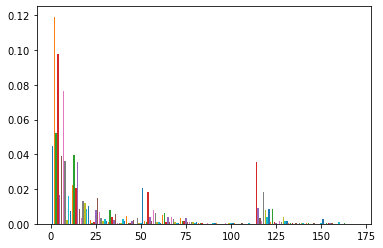

In [69]:
get_graph('super',allowed_words)